In [2]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import optbinning as opt
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import OneHotEncoder, StandardScaler,KBinsDiscretizer, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import mannwhitneyu ,chi2_contingency, anderson, f_oneway
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score


In [3]:
data=pd.read_csv("../data/application_train_vf.csv",parse_dates=["date_mensuelle"], index_col=0)

In [4]:
data["SK_ID_CURR"].value_counts().max()

1

In [5]:
data["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         276940
Revolving loans     29167
Name: count, dtype: int64

In [143]:
data=data[data["NAME_CONTRACT_TYPE"]=="Revolving loans"]

KeyError: 'NAME_CONTRACT_TYPE'

In [7]:
data.drop(columns=["NAME_CONTRACT_TYPE"], inplace = True)

In [8]:
pd.DataFrame(data.isna().mean())

0
SK_ID_CURR                    0.000000
TARGET                        0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.000000
AMT_GOODS_PRICE               0.009497
NAME_TYPE_SUITE               0.009737
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_REGISTRATION             0.000000
DAYS_ID_PUBLISH               0.000000
OWN_CAR_AGE                   0.653718
FLAG_MOBIL                    0.000000
FLAG_EMP_PHONE                0.000000
FLAG_WORK_PHONE               0.000000
FLAG_CONT_MOBILE              0.000000
FLAG_PHONE                    0.000000
FLAG_EMAIL                    0.000000
OCCUPATION_TYPE               0.259540
CNT_FAM_MEMBERS               0.000069
REGION_RATING_CLIENT          0.000000
REGION_RATING_CLIENT_W_CITY   0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
HOUR_APPR_PROCESS_START       0.000000
REG_REGION_NOT_LIVE_REGION    0.000000
REG_REGION_NOT_WORK_REGION    0.000000
LIVE_REGION_NOT_WORK_REGION   0.000000
REG_CITY_NOT_LIVE_CITY        0.000000
REG_CITY_NOT_WORK_CITY        0.000000
LIVE_CITY_NOT_WORK_CITY       0.000000
ORGANIZATION_TYPE             0.000000
EXT_SOURCE_1                  0.524600
EXT_SOURCE_2                  0.002091
EXT_SOURCE_3                  0.214935
APARTMENTS_AVG                0.465835
BASEMENTAREA_AVG              0.545651
YEARS_BEGINEXPLUATATION_AVG   0.445915
YEARS_BUILD_AVG               0.631364
COMMONAREA_AVG                0.670141
ELEVATORS_AVG                 0.491377
ENTRANCES_AVG                 0.460760
FLOORSMAX_AVG                 0.455515
FLOORSMIN_AVG                 0.646073
LANDAREA_AVG                  0.554942
LIVINGAPARTMENTS_AVG          0.653204
LIVINGAREA_AVG                0.461755
NONLIVINGAPARTMENTS_AVG       0.664312
NONLIVINGAREA_AVG             0.511228
APARTMENTS_MODE               0.465835
BASEMENTAREA_MODE             0.545651
YEARS_BEGINEXPLUATATION_MODE  0.445915
YEARS_BUILD_MODE              0.631364
COMMONAREA_MODE               0.670141
ELEVATORS_MODE                0.491377
ENTRANCES_MODE                0.460760
FLOORSMAX_MODE                0.455515
FLOORSMIN_MODE                0.646073
LANDAREA_MODE                 0.554942
LIVINGAPARTMENTS_MODE         0.653204
LIVINGAREA_MODE               0.461755
NONLIVINGAPARTMENTS_MODE      0.664312
NONLIVINGAREA_MODE            0.511228
APARTMENTS_MEDI               0.465835
BASEMENTAREA_MEDI             0.545651
YEARS_BEGINEXPLUATATION_MEDI  0.445915
YEARS_BUILD_MEDI              0.631364
COMMONAREA_MEDI               0.670141
ELEVATORS_MEDI                0.491377
ENTRANCES_MEDI                0.460760
FLOORSMAX_MEDI                0.455515
FLOORSMIN_MEDI                0.646073
LANDAREA_MEDI                 0.554942
LIVINGAPARTMENTS_MEDI         0.653204
LIVINGAREA_MEDI               0.461755
NONLIVINGAPARTMENTS_MEDI      0.664312
NONLIVINGAREA_MEDI            0.511228
FONDKAPREMONT_MODE            0.651524
HOUSETYPE_MODE                0.459458
TOTALAREA_MODE                0.440704
WALLSMATERIAL_MODE            0.467378
EMERGENCYSTATE_MODE           0.431412
OBS_30_CNT_SOCIAL_CIRCLE      0.034902
DEF_30_CNT_SOCIAL_CIRCLE      0.034902
OBS_60_CNT_SOCIAL_CIRCLE      0.034902
DEF_60_CNT_SOCIAL_CIRCLE      0.034902
DAYS_LAST_PHONE_CHANGE        0.000000
FLAG_DOCUMENT_2               0.000000
FLAG_DOCUMENT_3               0.000000
FLAG_DOCUMENT_4               0.000000
FLAG_DOCUMENT_5               0.000000
FLAG_DOCUMENT_6               0.000000
FLAG_DOCUMENT_7               0.000000
FLAG_DOCUMENT_8               0.000000
FLAG_DOCUMENT_9     

In [9]:
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.948641
1    0.051359
Name: proportion, dtype: float64

#### Variables CREDIT BUREAU

In [10]:
credit_bureau_data=pd.read_csv("../data/cb_findings.csv", index_col=0)
data=data.merge(credit_bureau_data, left_on="SK_ID_CURR", right_on="CB_SK_ID_CURR")

In [11]:
credit_bureau_data.isna().mean()

CB_SK_ID_CURR             0.0
CB_AMT_CREDIT_SUM_DEBT    0.0
CB_NB_CREDIT_ACTIVE       0.0
CB_NB_CREDIT_CLOSED       0.0
CB_DAYS_CREDIT            0.0
CB_DAYS_CREDIT_ENDDATE    0.0
CB_AMT_CREDIT_SUM         0.0
CB_AMT_ANNUITY            0.0
dtype: float64

#### Etudes des variables -- prédicteurs potentiels

In [12]:
data.dtypes

SK_ID_CURR                               int64
TARGET                                   int64
CODE_GENDER                             object
FLAG_OWN_CAR                            object
FLAG_OWN_REALTY                         object
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
AMT_ANNUITY                            float64
AMT_GOODS_PRICE                        float64
NAME_TYPE_SUITE                         object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
REGION_POPULATION_RELATIVE             float64
DAYS_BIRTH                               int64
DAYS_EMPLOYED                            int64
DAYS_REGISTRATION                      float64
DAYS_ID_PUBLISH                          int64
OWN_CAR_AGE                            float64
FLAG_MOBIL   

In [13]:
data["HAS_CHILDREN"]=data["CNT_CHILDREN"].apply(lambda x : "Y" if x > 0 else "N")
data.drop(columns=["CNT_CHILDREN"], inplace=True)

In [14]:
data.nunique()

SK_ID_CURR                      29167
TARGET                              2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
AMT_INCOME_TOTAL                  520
AMT_CREDIT                         35
AMT_ANNUITY                        45
AMT_GOODS_PRICE                    39
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         80
DAYS_BIRTH                      13206
DAYS_EMPLOYED                    6455
DAYS_REGISTRATION               10772
DAYS_ID_PUBLISH                  5520
OWN_CAR_AGE                        49
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
OCCUPATION_T

In [15]:
drop_documents_cols=["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4" , 
"FLAG_DOCUMENT_5" , "FLAG_DOCUMENT_6","FLAG_DOCUMENT_7" ,              
"FLAG_DOCUMENT_8" , "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10"  ,"FLAG_DOCUMENT_11" , "FLAG_DOCUMENT_12",              
"FLAG_DOCUMENT_13" ,"FLAG_DOCUMENT_14" ,"FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16" ,
"FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18","FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]

In [16]:
data.drop(columns=drop_documents_cols, inplace=True)

In [17]:
def convert_numeric_to_category(df: pd.DataFrame):
    for colname in df.columns.tolist():
        if (df[colname].dtype=="number") & (df[colname].nunique() <=10):
            df[colname]=df[colname].astype("category")
            pass
        else:
            pass

In [18]:
convert_numeric_to_category(data)

In [19]:
data["date_annee"]=data["date_mensuelle"].dt.year

In [20]:
data["date_trimestre"]=100*data["date_annee"] + data["date_mensuelle"].dt.quarter

In [21]:
data["date_trimestre"]=data["date_trimestre"].astype(str)

In [22]:
out_of_sample_data=data[data["date_annee"]==2020]
data=data[data["date_annee"]<2020]

In [23]:
out_of_sample_data["TARGET"].value_counts(normalize=True)


TARGET
0    0.949473
1    0.050527
Name: proportion, dtype: float64

In [24]:
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.948641
1    0.051359
Name: proportion, dtype: float64

In [25]:
categorical_vars=data.select_dtypes(include="object").columns.tolist()
numerical_vars=data.select_dtypes(include="number").columns.tolist()
binary_vars=[var for var in numerical_vars if (data[var].nunique()==2)&(var !="TARGET")]

In [26]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


def mannwhitney_test(df:pd.DataFrame,variable:str,target:str):
    # Séparer les données en deux groupes en fonction de la variable cible
    group_1 = df[df[target] == 0]
    group_2 = df[df[target] == 1]

    stat, p_value = mannwhitneyu(group_1[variable].dropna(), group_2[variable].dropna())
    # Afficher les résultats
    print(f"Variable: {variable}")
    print(f"Mann-Whitney U-statistic: {stat}")
    print(f"P-value: {p_value}")
    print(10*"===")
    
    pass


def calculate_information_value_from_contingency_table(contingency_table):
    """
    Calculer l'Information Value à partir d'une table de contingence.
    
    Args:
        contingency_table (pd.DataFrame): La table de contingence entre la variable et la target.
        
    Returns:
        float: L'Information Value calculé.
    """
    non_event_rate=contingency_table.iloc[0]/(contingency_table.iloc[0].sum())
    event_rate=contingency_table.iloc[1]/(contingency_table.iloc[1].sum())
    iv=0
    if (non_event_rate.min() > 0) & (event_rate.mean() >0) :
        for col in non_event_rate.index:
            iv += (event_rate[col] - non_event_rate[col])*np.log(event_rate[col] / non_event_rate[col])

    return iv

In [27]:
data["date_trimestre"].max()

'202004'

In [28]:
def show_volume_stability_overtime(data:pd.DataFrame,colname:str,threshold=0.05):
        # Calcul des pourcentages pour chaque modalité au fil du temps
    resultats = data[[colname, "date_annee"]].groupby(by=["date_annee"]).value_counts(normalize=True).unstack().fillna(0)

    # Affichage des lineplots
    sns.set(style="whitegrid")
    resultats.plot(kind='line', marker='o', markersize=8)
    plt.title('Pourcentage de chaque modalité au fil du temps')
    plt.hlines(y=threshold, xmin=data["date_annee"].min(), xmax=data["date_annee"].max(), linestyles="dashed")
    plt.xlabel('Temps')
    plt.ylabel('Pourcentage')
    plt.legend(title=f"{colname}")
    # plt.xticks(rotation=90)
    plt.show()
    
    
def show_risk_stability_overtime(data:pd.DataFrame,colname:str):
    result = data.groupby([colname, "date_annee"])['TARGET'].value_counts(normalize=True).unstack().fillna(0)[1]

    # Tracer le lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=result.index.get_level_values("date_annee"), y=result.values, hue=result.index.get_level_values(f"{colname}"), marker='o')

    # Ajouter des étiquettes et un titre
    plt.xlabel('date_annee')
    plt.ylabel('Taux de défaut')
    plt.title(f"Taux de défaut en fonction de {colname} et année")

    # Ajouter une légende
    plt.legend(title=f"{colname}")
    # plt.xticks(rotation=90)
    # Afficher le graphique
    plt.show()
    

#### Test de stabilité en risque des variables binaires

In [29]:
binary_vars

['FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [30]:
data["FLAG_MOBIL"].value_counts()

FLAG_MOBIL
1    29167
Name: count, dtype: int64

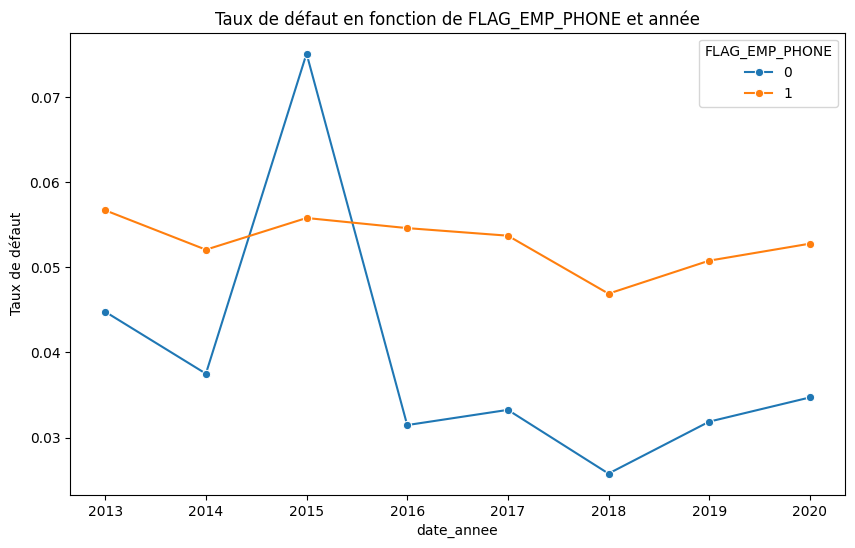

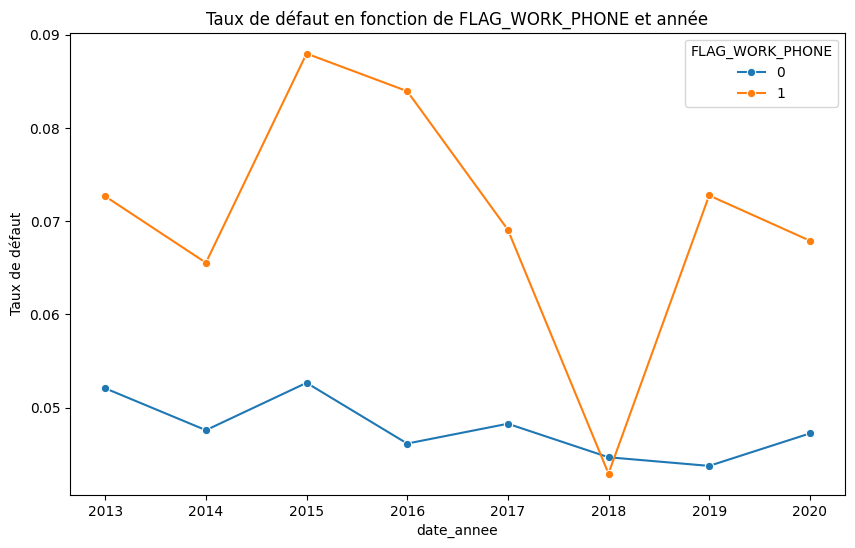

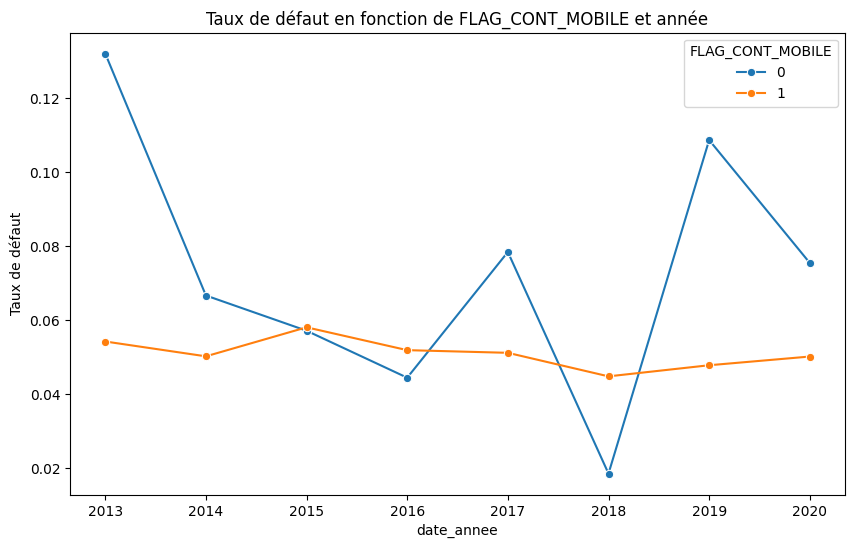

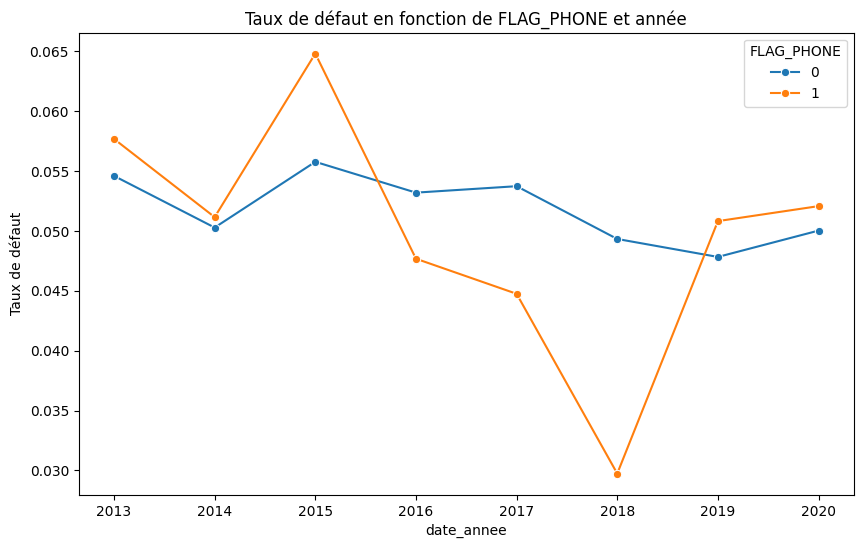

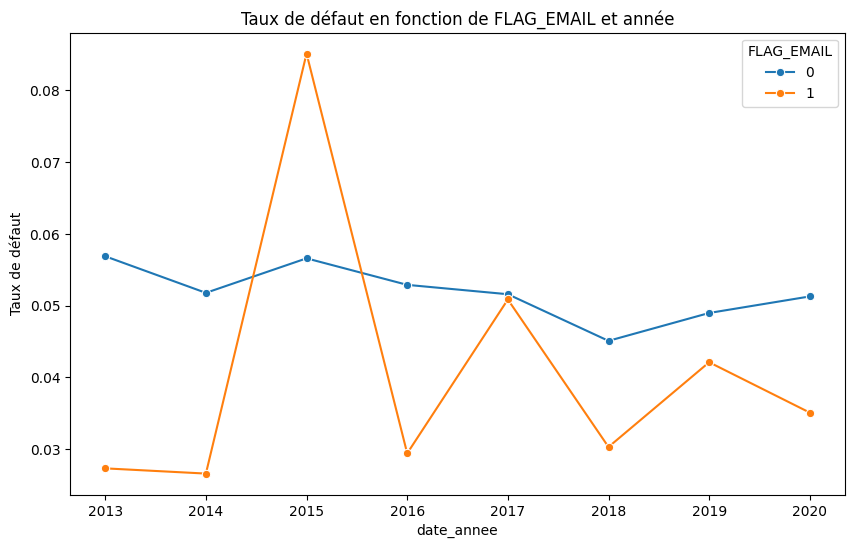

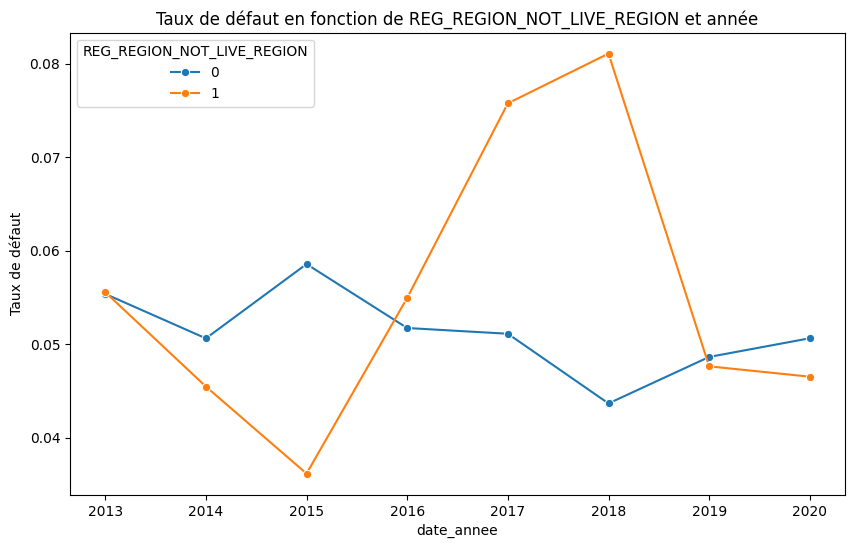

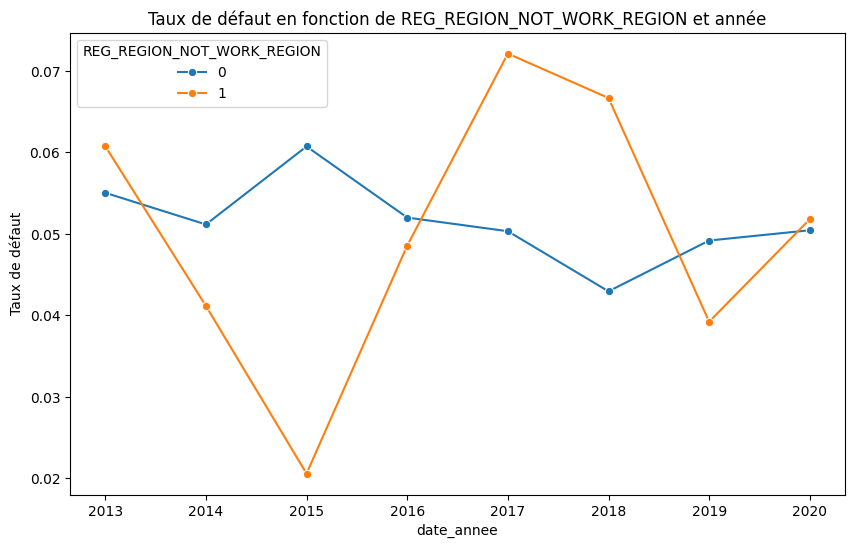

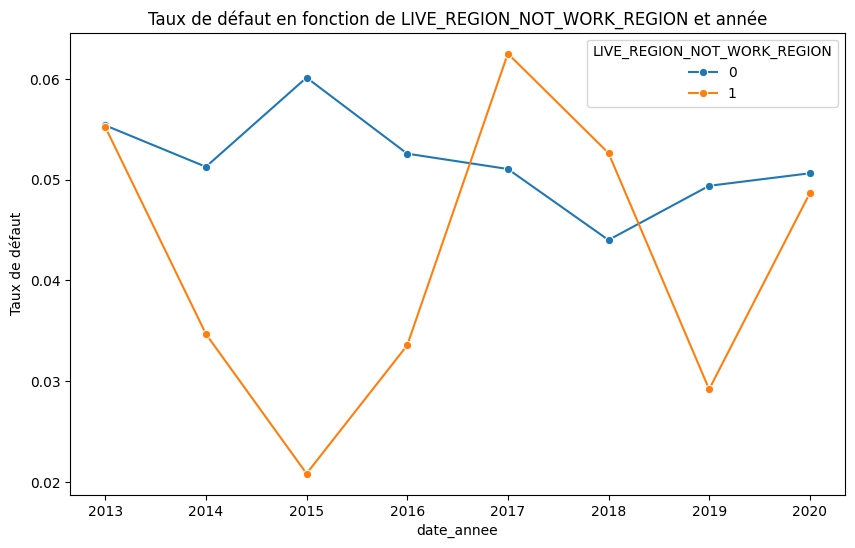

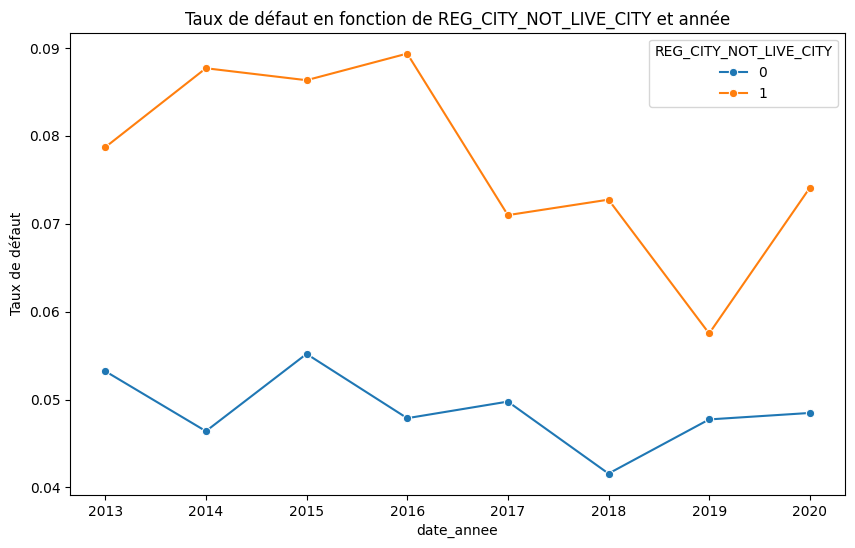

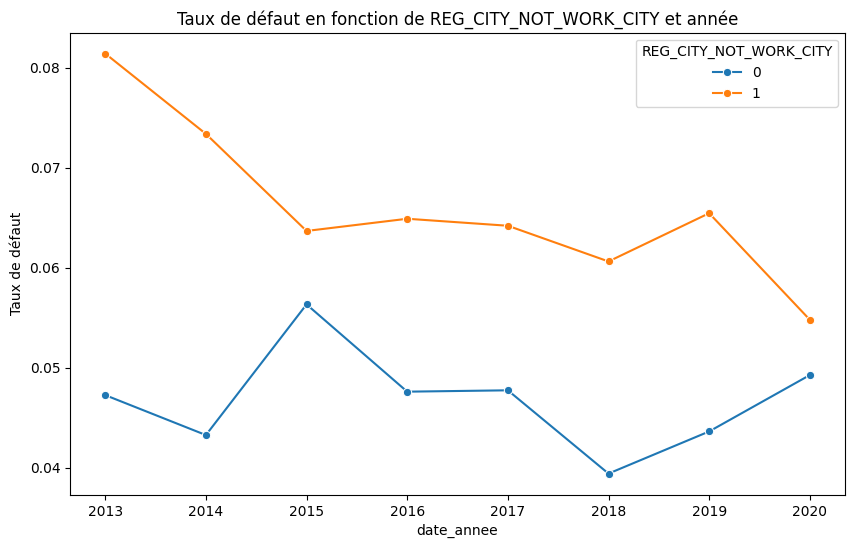

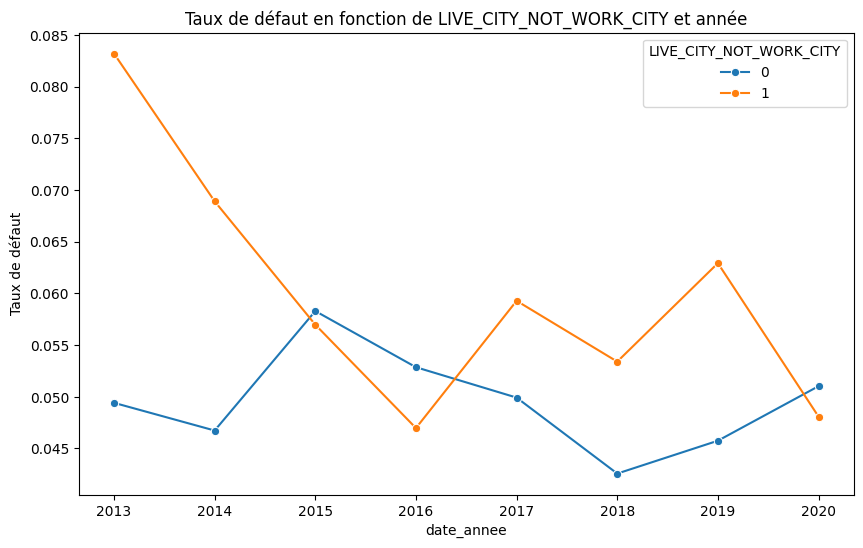

In [31]:
for var in binary_vars:
    show_risk_stability_overtime(data,var)

In [32]:
#### variables à écarter : flag_mobil, flag_cont_mobil, flag_email, reg_region_not_live_region, reg_region_not_work_region,live_region_not_work_region, 

In [33]:
binary_risk_non_stable_vars=["FLAG_MOBIL", "FLAG_CONT_MOBILE", "FLAG_EMAIL", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION"]

In [34]:
binary_vars=list(filter(lambda x : x not in binary_risk_non_stable_vars, binary_vars))

In [35]:
from scipy.stats import chi2_contingency

In [36]:
for col in binary_vars:
    print(col)
    print(chi2_contingency(pd.crosstab(data["TARGET"], data[col].dropna())))
    print(60*"=")

FLAG_EMP_PHONE
Chi2ContingencyResult(statistic=11.08359047145794, pvalue=0.0008709499957202415, dof=1, expected_freq=array([[ 3187.4323722, 24481.5676278],
       [  172.5676278,  1325.4323722]]))
FLAG_WORK_PHONE
Chi2ContingencyResult(statistic=39.62037933131373, pvalue=3.084476970108082e-10, dof=1, expected_freq=array([[23309.04786231,  4359.95213769],
       [ 1261.95213769,   236.04786231]]))
FLAG_PHONE
Chi2ContingencyResult(statistic=0.39445946319382796, pvalue=0.529964583417867, dof=1, expected_freq=array([[20709.77265403,  6959.22734597],
       [ 1121.22734597,   376.77265403]]))
REG_CITY_NOT_LIVE_CITY
Chi2ContingencyResult(statistic=39.81148735107347, pvalue=2.7969523166768455e-10, dof=1, expected_freq=array([[25199.68855213,  2469.31144787],
       [ 1364.31144787,   133.68855213]]))
REG_CITY_NOT_WORK_CITY
Chi2ContingencyResult(statistic=39.63145355841947, pvalue=3.067035785081043e-10, dof=1, expected_freq=array([[21135.71227757,  6533.28772243],
       [ 1144.28772243,   353.

#### Test de stabilité en volume des variables binaires

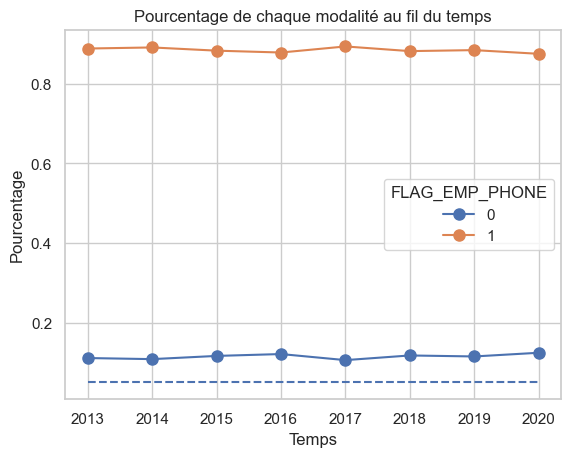

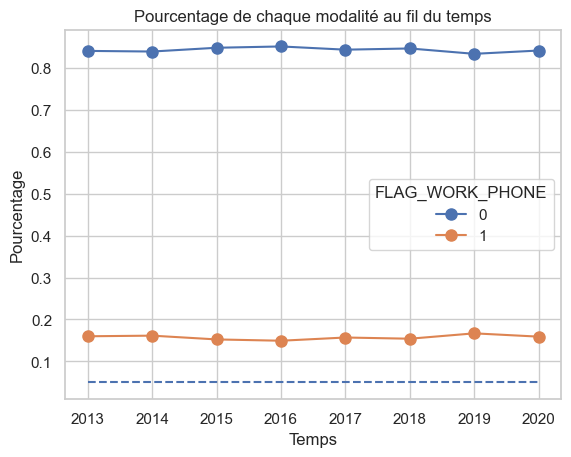

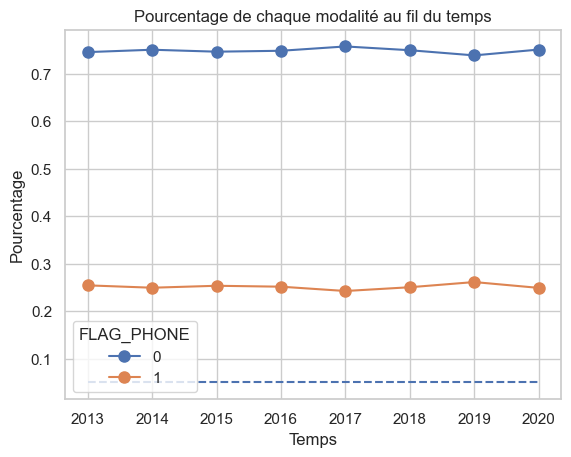

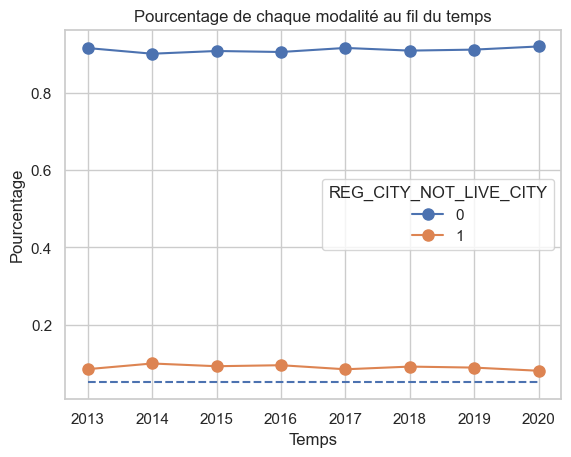

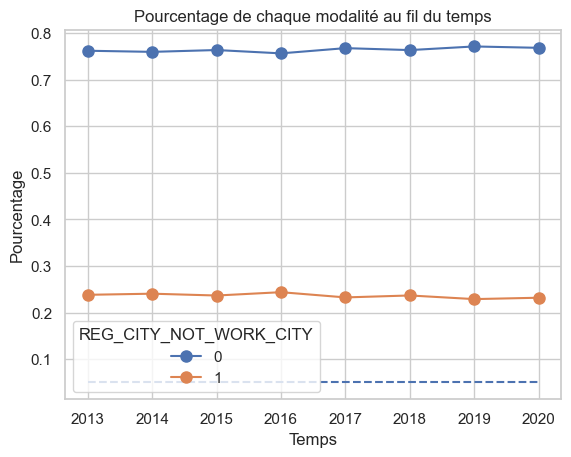

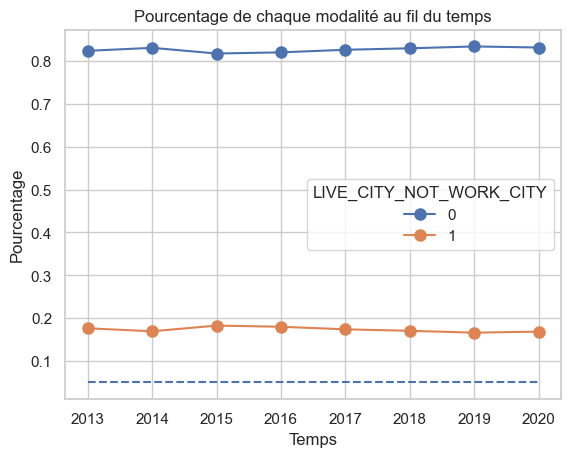

In [37]:
for var in binary_vars:
    show_volume_stability_overtime(data,var)

In [38]:
#### variables à virer : flag_mobil , flag_cont_mobil,reg_region_not_live_region, live_region_not_work_region

In [39]:
binary_volume_non_stable_vars=[]

In [40]:
# variables à virer parmi les binaires:
binary_non_stable_vars=list(set(binary_volume_non_stable_vars+binary_risk_non_stable_vars))

In [41]:
binary_vars=list(filter(lambda x : x not in binary_non_stable_vars,binary_vars))

In [42]:
data.drop(columns=binary_non_stable_vars, inplace=True)

In [43]:
numerical_vars=list(filter(lambda x : x not in binary_vars+binary_non_stable_vars,numerical_vars))

In [44]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 '

#### Model Benchmark

#### Test de stabilité des variables catégorielles à faible modalité (2-4)

In [45]:
low_category_categorical_vars=[var for var in categorical_vars+numerical_vars if  (var not in binary_vars+binary_non_stable_vars+["TARGET"]) & (data[var].nunique()>=2) & (data[var].nunique()<=4)]

In [46]:
low_category_categorical_vars

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'HAS_CHILDREN',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY']

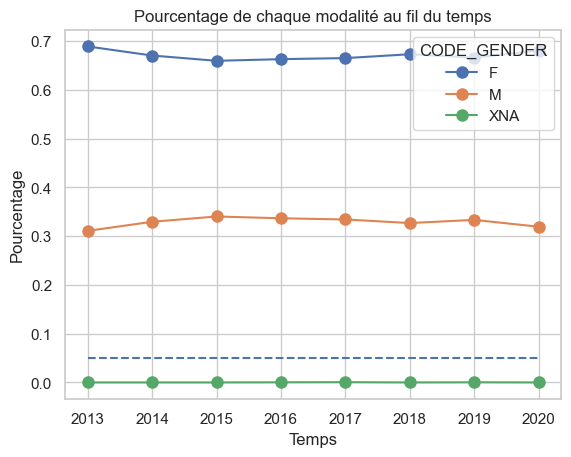

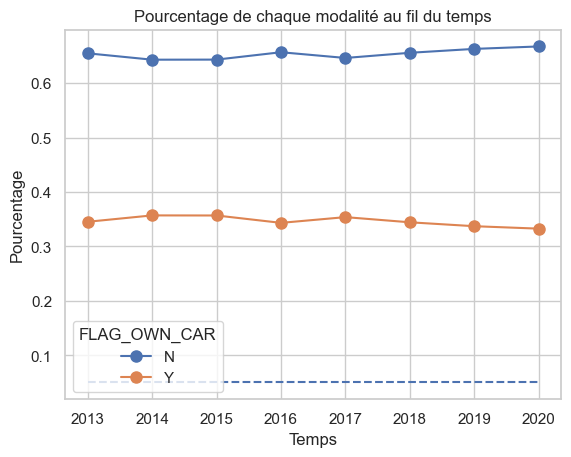

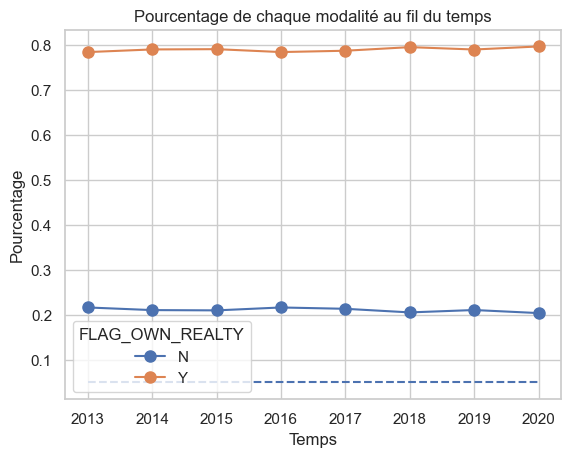

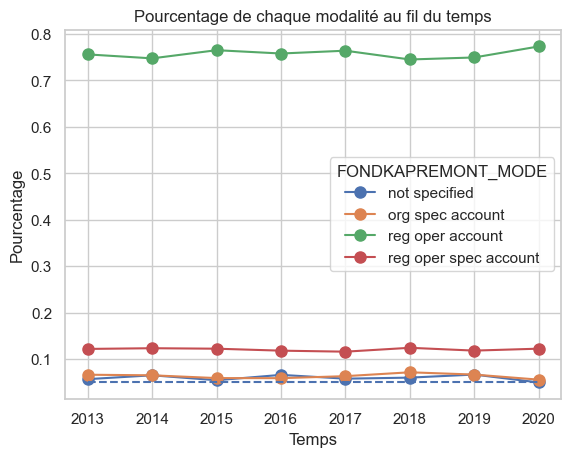

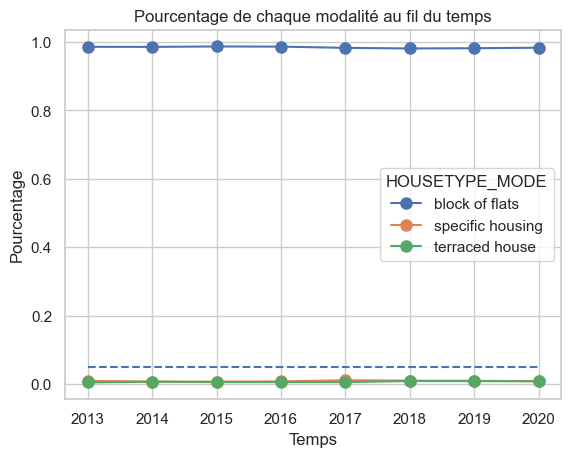

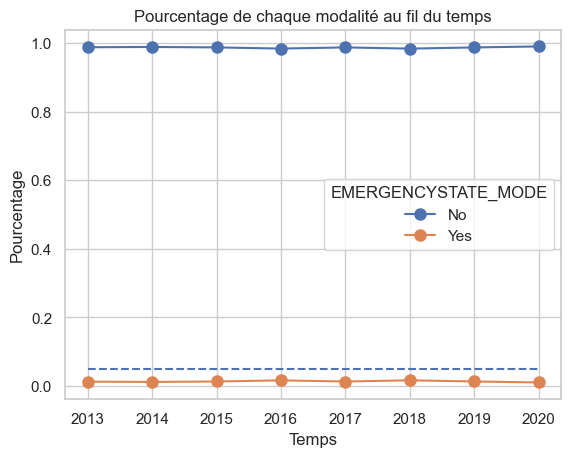

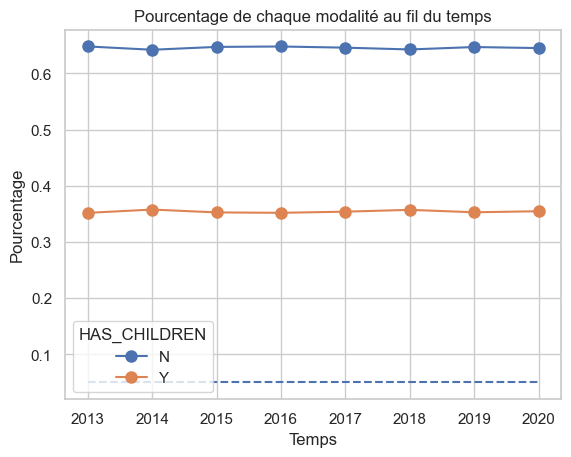

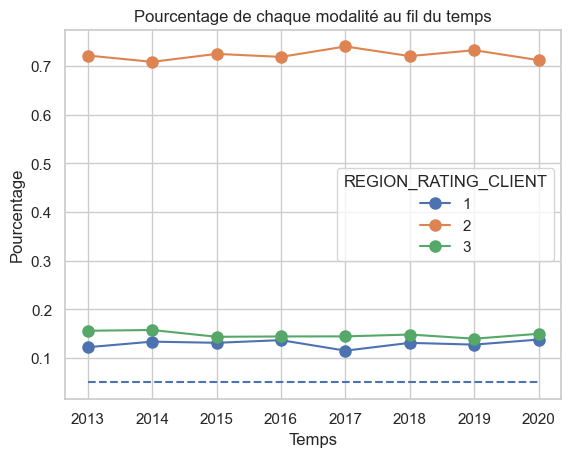

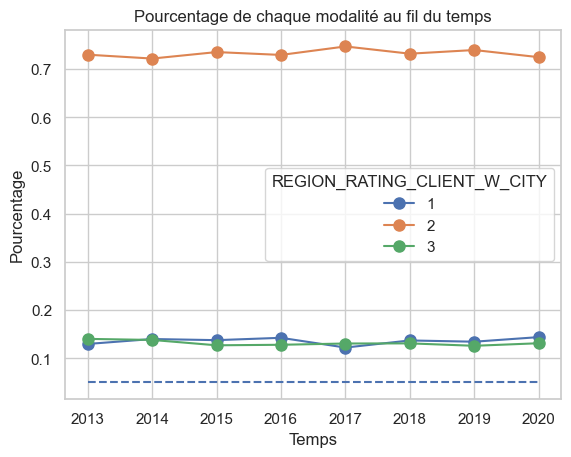

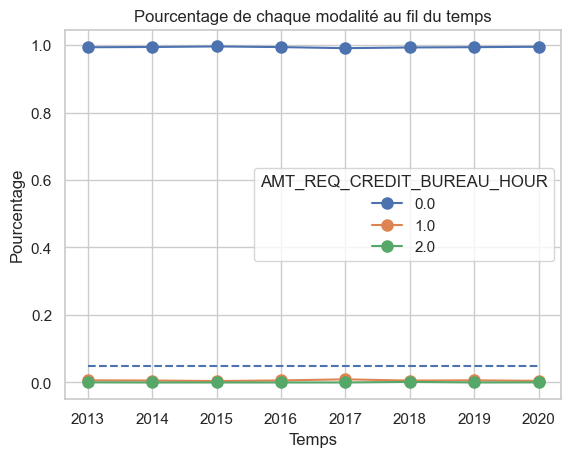

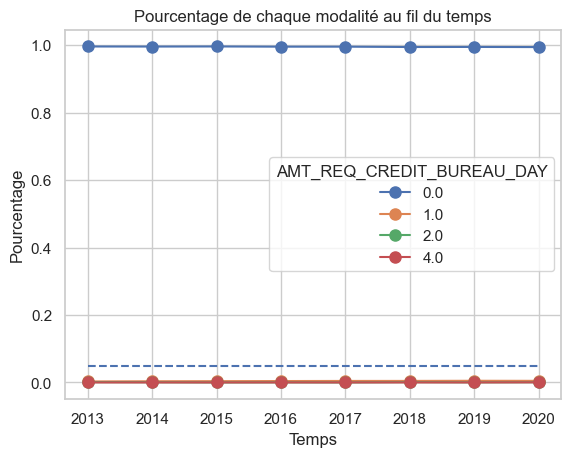

In [47]:
for colname in low_category_categorical_vars:
    show_volume_stability_overtime(data,colname)

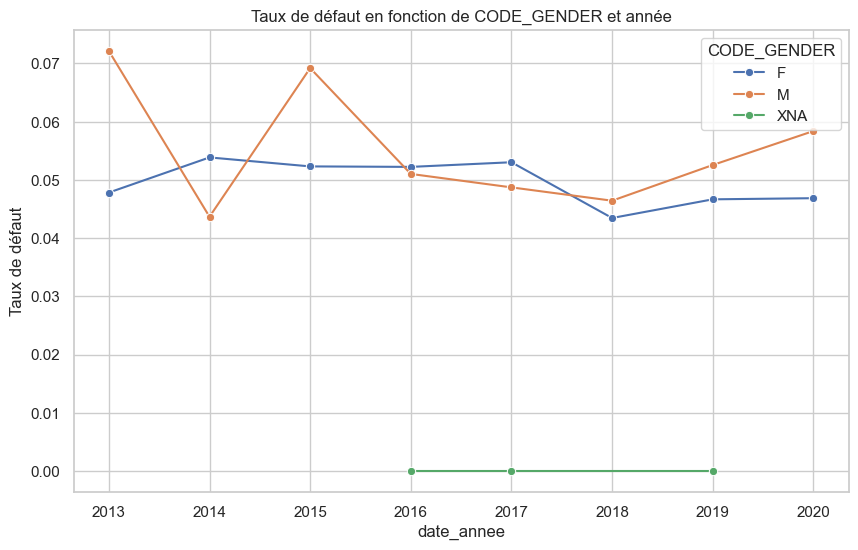

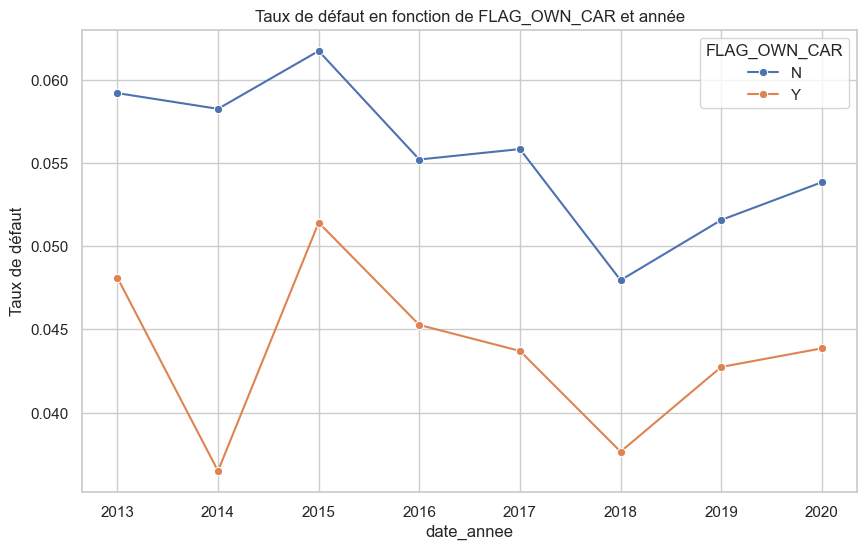

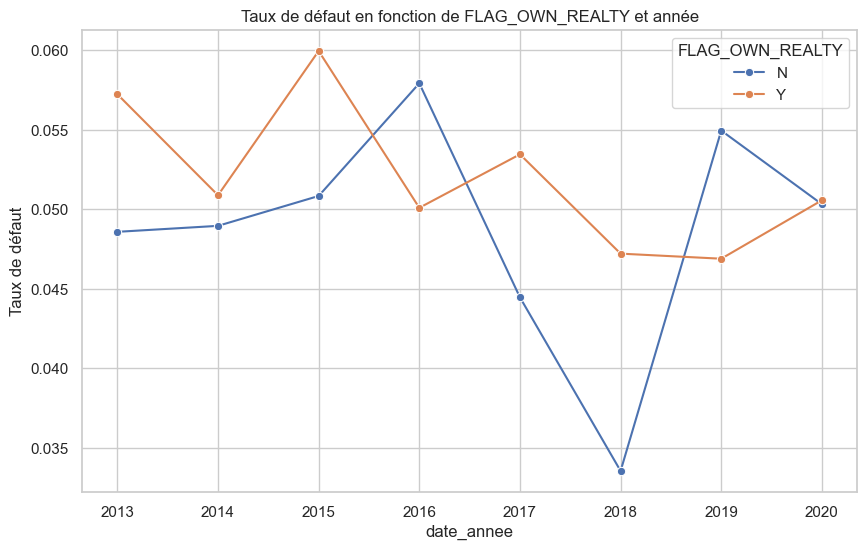

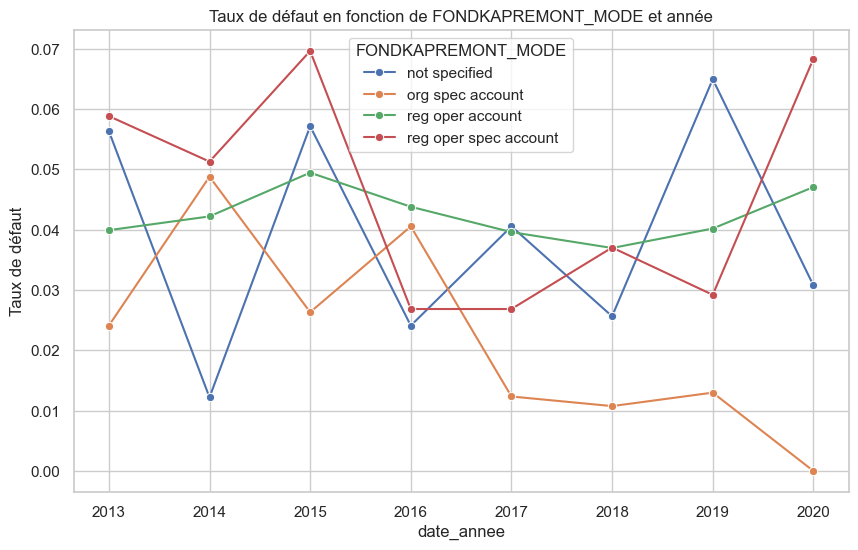

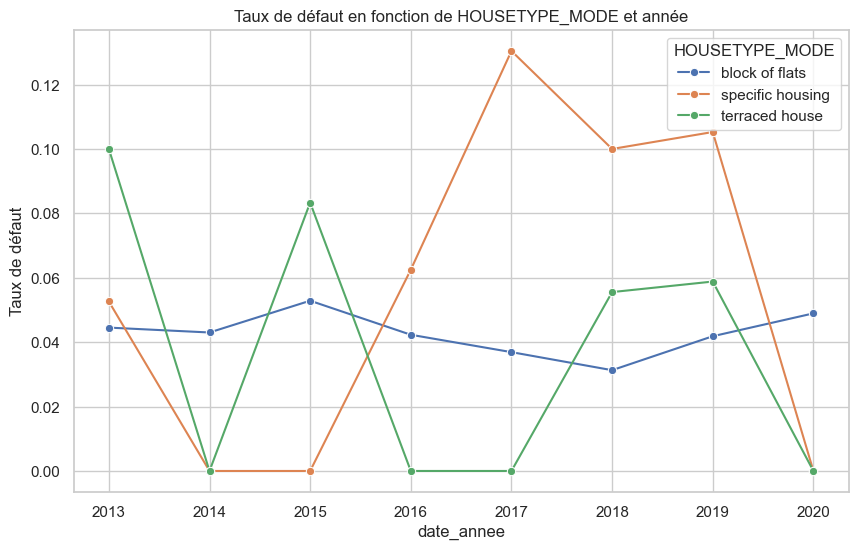

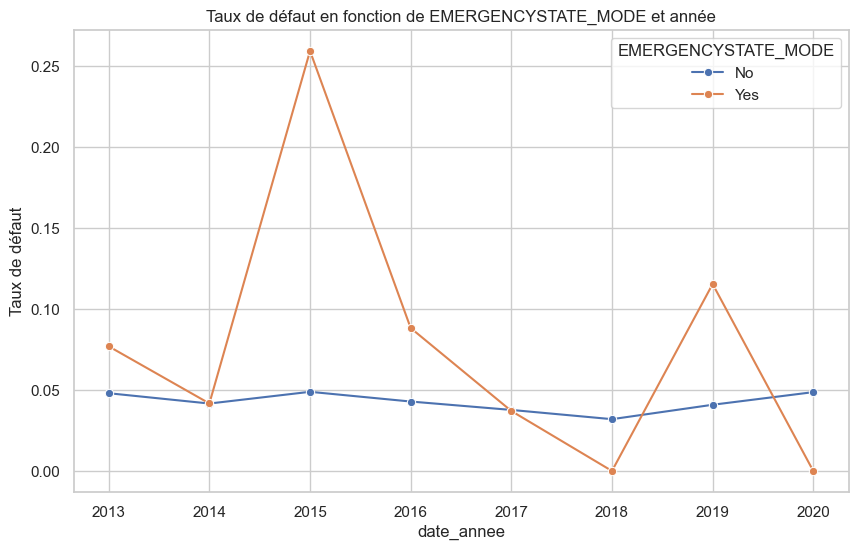

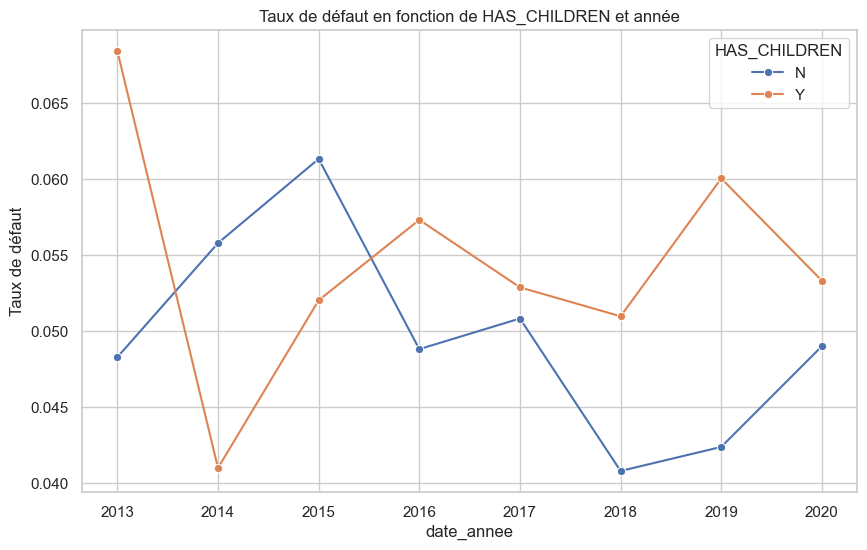

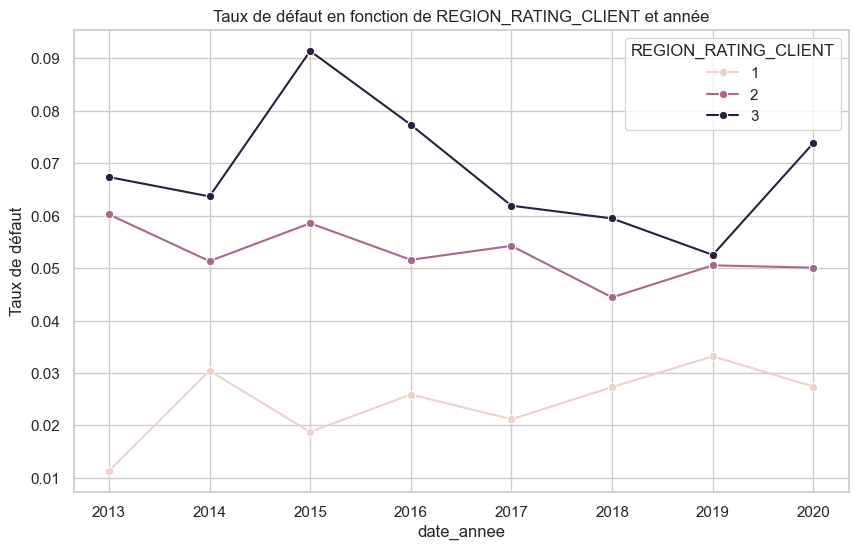

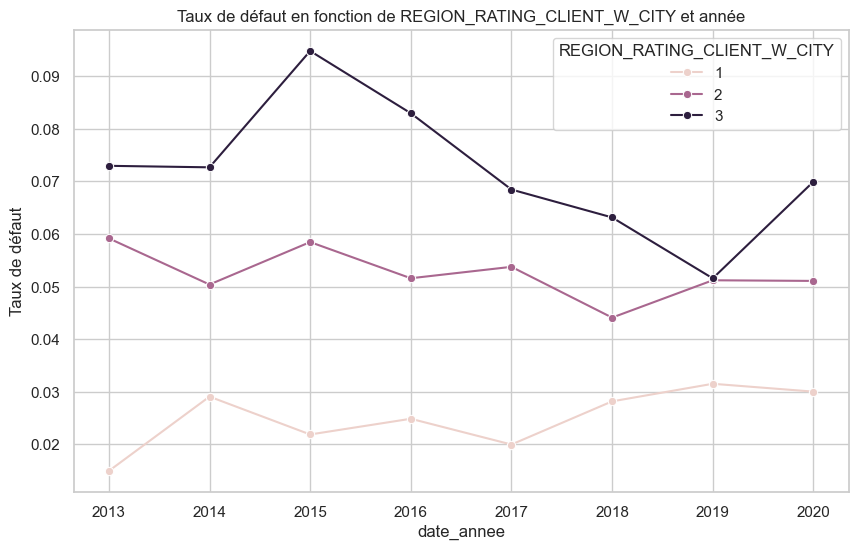

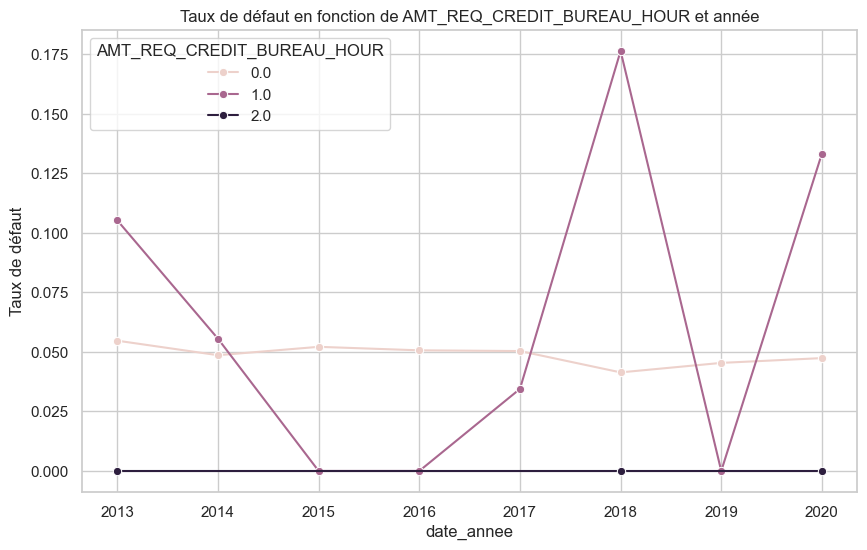

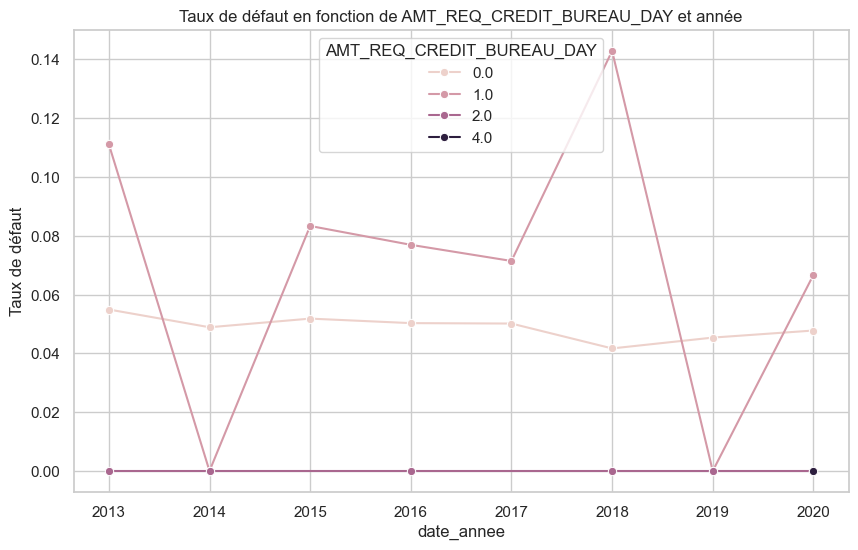

In [48]:
for col in low_category_categorical_vars:
    show_risk_stability_overtime(data,col)

In [49]:
low_category_non_stable_vars=["FLAG_OWN_REALTY", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "EMERGENCYSTATE_MODE"]
low_category_categorical_vars=list(filter(lambda x : x not in low_category_non_stable_vars,low_category_categorical_vars))

In [50]:
data["CODE_GENDER"]=data["CODE_GENDER"].apply(lambda x: "F" if x =="XNA" else x )

In [51]:
data.drop(columns=low_category_non_stable_vars)

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0          239979       0           M            Y          416029.5    135000.0       6750.0         135000.0   Unaccompanied               Working               Higher education               Married  House / apartment                    0.031329      -12280           -940             -378.0            -3952          7.0               1                1           0      Core staff              3.0                     2                            2                    TUESDAY                       12                       0                       1                        1           Trade: type 2      0.477486      0.559106           NaN          0.2670            0.1529                       0.9985           0.9796          0.1011           0.12         0.1034         0.3333         0.3750        1.0000                0.2085          0.2290                   0.0425             0.0586           0.2721             0.1587                        0.9985            0.9804           0.1020   
1          316728       0           F            Y           67500.0    247500.0      12375.0         247500.0   Unaccompanied               Working  Secondary / secondary special               Married  House / apartment                    0.018850      -10116           -980            -2681.0            -2751         18.0               1                1           1             NaN              5.0                     2                            2                   THURSDAY                       15                       0                       1                        1  Business Entity Type 3      0.247592      0.796628      0.294083             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN                   NaN             NaN                      NaN                NaN              NaN                NaN                           NaN               NaN              NaN   
2          147573       0           F            N          157500.0    180000.0       9000.0         180000.0   Unaccompanied               Working  Secondary / secondary special               Married  House / apartment                    0.035792      -12180          -5589            -1200.0            -4713          NaN               1                0           0             NaN              3.0                     2                            2                   THURSDAY                       14                       0                       0                        0  Business Entity Type 3      0.378587      0.724057      0.651260          0.0412            0.0492                       0.9921           0.8912          0.0229           0.00         0.1379         0.1667         0.2083        0.0512                0.0336          0.0462                   0.0000             0.0000           0.0420             0.0511                        0.9921            0.8955           0.0231   
3  

#### Test de stabilité des autres variables catégorielles

In [52]:
categorical_vars=list(filter(lambda x : x not in binary_non_stable_vars+binary_vars+low_category_categorical_vars+low_category_non_stable_vars, categorical_vars))

In [53]:
for col in categorical_vars:
    print(data[col].value_counts(normalize=True))
    print(40*"=")

NAME_TYPE_SUITE
Unaccompanied      0.827373
Family             0.119274
Spouse, partner    0.032407
Children           0.010387
Other_B            0.006128
Other_A            0.003462
Group of people    0.000969
Name: proportion, dtype: float64
NAME_INCOME_TYPE
Working                 0.548085
Commercial associate    0.272054
Pensioner               0.115233
State servant           0.063839
Businessman             0.000343
Unemployed              0.000240
Maternity leave         0.000103
Student                 0.000103
Name: proportion, dtype: float64
NAME_EDUCATION_TYPE
Secondary / secondary special    0.623513
Higher education                 0.326259
Incomplete higher                0.042480
Lower secondary                  0.007131
Academic degree                  0.000617
Name: proportion, dtype: float64


NAME_FAMILY_STATUS
Married                 0.605307
Single / not married    0.195632
Civil marriage          0.095382
Separated               0.065931
Widow                   0.037680
Unknown                 0.000069
Name: proportion, dtype: float64
NAME_HOUSING_TYPE
House / apartment      0.870299
With parents           0.063291
Municipal apartment    0.032400
Rented apartment       0.020194
Office apartment       0.009463
Co-op apartment        0.004354
Name: proportion, dtype: float64
OCCUPATION_TYPE
Laborers                 0.232995
Sales staff              0.164467
Core staff               0.147474
Managers                 0.121545
High skill tech staff    0.063388
Drivers                  0.062370
Accountants              0.055656
Medicine staff           0.036811
Security staff           0.025050
Cooking staff            0.023383
Cleaning staff           0.019123
Private service staff    0.013474
Waiters/barmen staff     0.008103
Low-skill Laborers       0.007547
Secretaries    

In [54]:
for col in categorical_vars:
    n=data.shape[0]
    contingency_table=pd.crosstab(data["TARGET"], data[col])
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True) #Application d'une correction de Yates par rapport à la faible représentation des classes
    k, r = contingency_table.shape
    v_cramer = np.sqrt(chi2 / (n * min(k-1, r-1)))
    print(f"\nCrosstab for {col}:\n")
    print(contingency_table)
    print("\n" + "-"*40)
    print(f"\nChi-squared: {chi2}")
    print(f"P-value: {p}")
    print(f"Cramer's V: {v_cramer}")
    print("\n" + "="*80)
    


Crosstab for NAME_TYPE_SUITE:

NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  Spouse, partner  Unaccompanied
TARGET                                                                                              
0                     287    3273               26       98      159              895          22668
1                      13     172                2        2       18               41           1229

----------------------------------------

Chi-squared: 13.119683221760221
P-value: 0.041174251265007906
Cramer's V: 0.02120878520201635


Crosstab for NAME_INCOME_TYPE:

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  Pensioner  State servant  Student  Unemployed  Working
TARGET                                                                                                                      
0                          10                  7595                3       3229           1806        3           7    15016
1                 

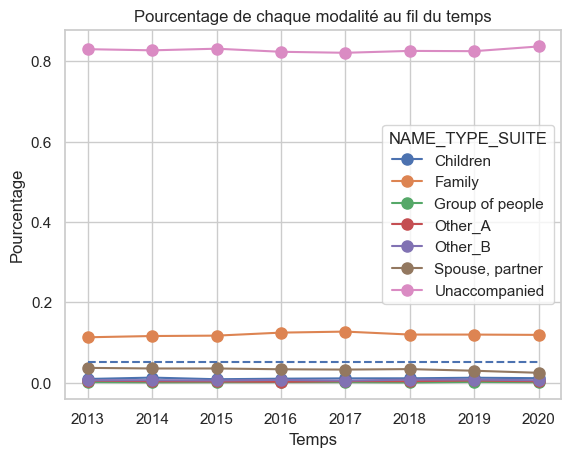

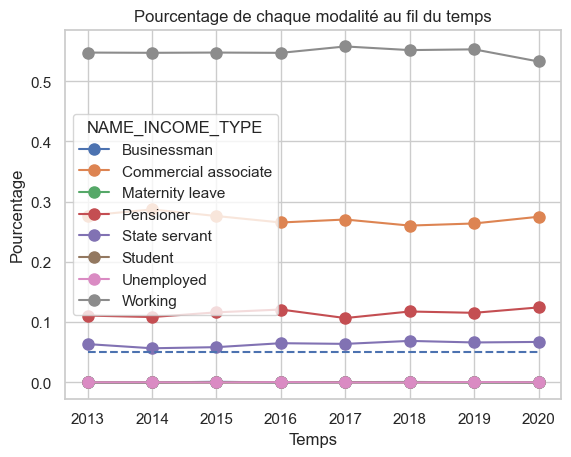

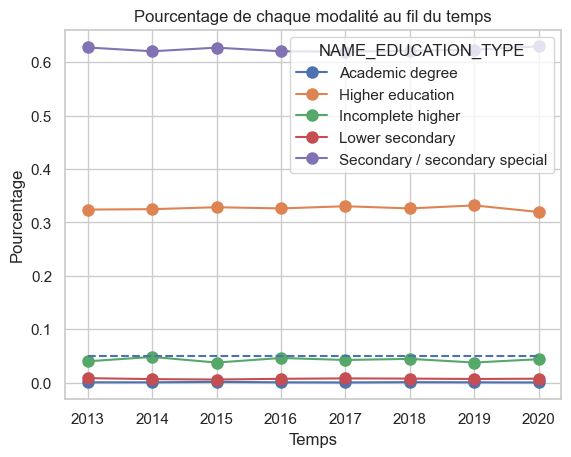

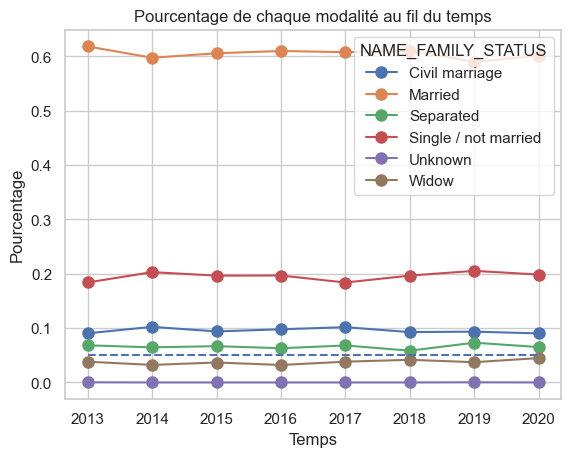

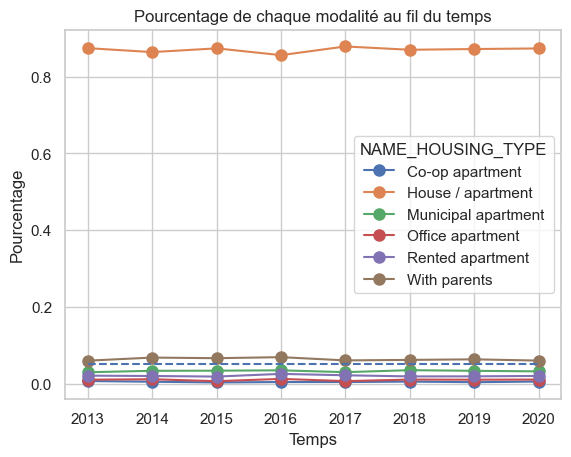

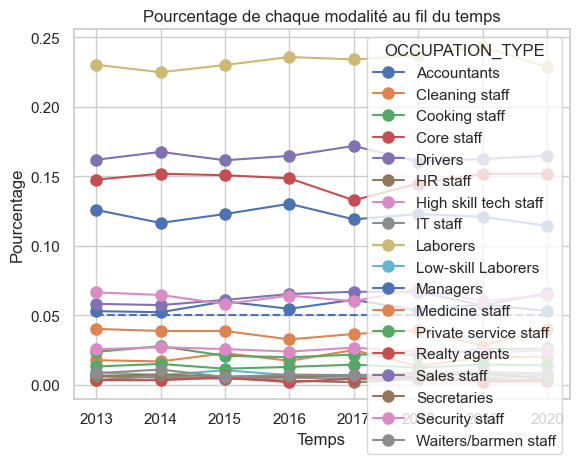

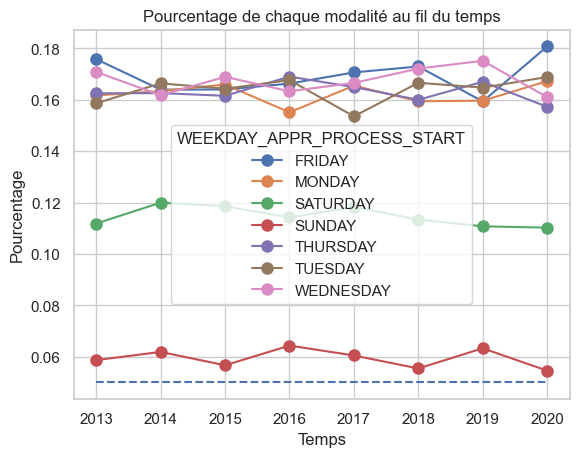

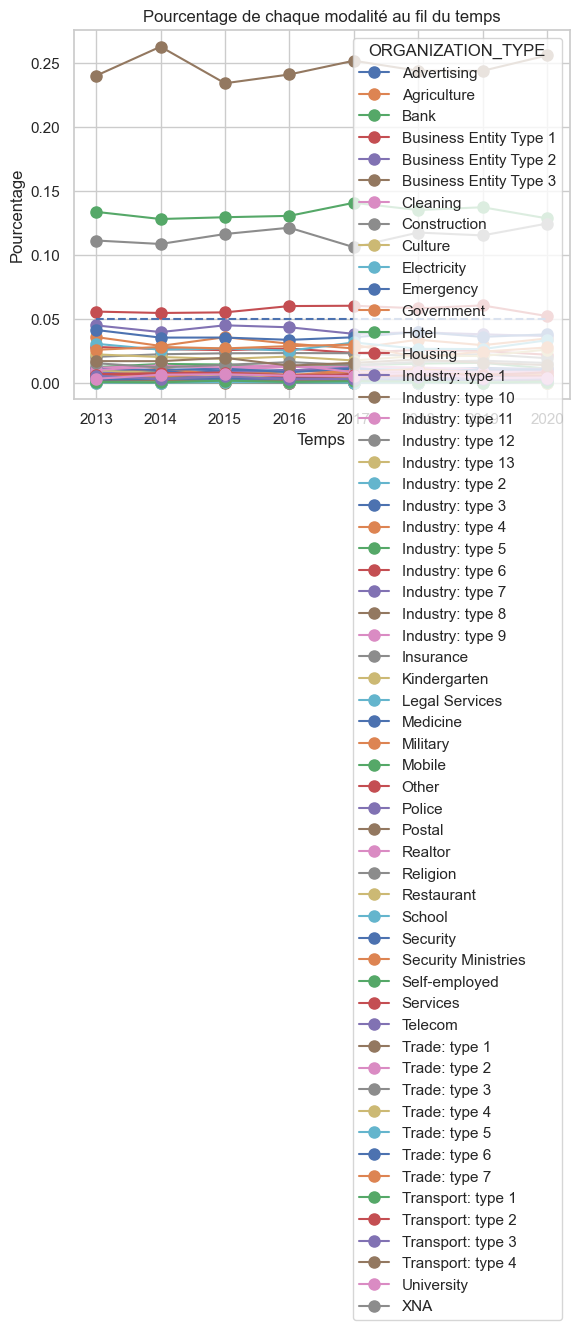

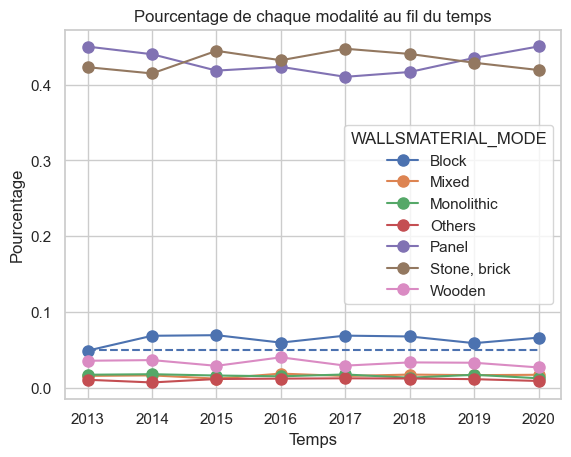

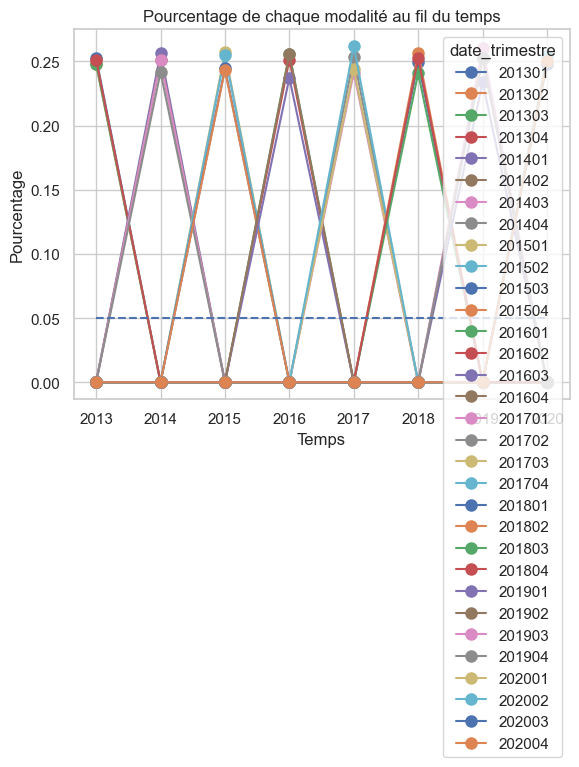

In [55]:
for col in categorical_vars:
    show_volume_stability_overtime(data,col)

In [56]:
data["OCCUPATION_TYPE"].value_counts(normalize=True)

OCCUPATION_TYPE
Laborers                 0.232995
Sales staff              0.164467
Core staff               0.147474
Managers                 0.121545
High skill tech staff    0.063388
Drivers                  0.062370
Accountants              0.055656
Medicine staff           0.036811
Security staff           0.025050
Cooking staff            0.023383
Cleaning staff           0.019123
Private service staff    0.013474
Waiters/barmen staff     0.008103
Low-skill Laborers       0.007547
Secretaries              0.006297
IT staff                 0.004908
HR staff                 0.003889
Realty agents            0.003519
Name: proportion, dtype: float64

In [57]:
data["REALTY"]="OWN_REALTY_"+data["FLAG_OWN_REALTY"]+"-TYPE_"+data["NAME_HOUSING_TYPE"]

In [58]:
data["REALTY"].value_counts(normalize=True)

REALTY
OWN_REALTY_Y-TYPE_House / apartment      0.724312
OWN_REALTY_N-TYPE_House / apartment      0.145987
OWN_REALTY_N-TYPE_With parents           0.033977
OWN_REALTY_Y-TYPE_With parents           0.029314
OWN_REALTY_N-TYPE_Municipal apartment    0.016217
OWN_REALTY_Y-TYPE_Municipal apartment    0.016183
OWN_REALTY_N-TYPE_Rented apartment       0.010526
OWN_REALTY_Y-TYPE_Rented apartment       0.009668
OWN_REALTY_Y-TYPE_Office apartment       0.006274
OWN_REALTY_Y-TYPE_Co-op apartment        0.003326
OWN_REALTY_N-TYPE_Office apartment       0.003189
OWN_REALTY_N-TYPE_Co-op apartment        0.001029
Name: proportion, dtype: float64

In [59]:
data["OCCUPATION_TYPE"].fillna("Unknown", inplace=True)

In [60]:
#from optbinning import OptimalBinning

ModuleNotFoundError: No module named 'optbinning'

In [61]:
group_occupation_type={
       0: ['IT staff', 'Accountants', 'HR staff', 'Managers', 'High skill tech staff', 'Core staff'],
       #1: ['High skill tech staff', 'Core staff'], 
       2: ['Unknown', 'Medicine staff', 'Private service staff'],
       3: ['Realty agents', 'Secretaries', 'Laborers', 'Security staff',
              'Sales staff', 'Drivers', 'Waiters/barmen staff', 'Cleaning staff',
              'Cooking staff', 'Low-skill Laborers']
}

In [62]:
data["OCCUPATION_TYPE"]=data["OCCUPATION_TYPE"].map({value: key for key, values in group_occupation_type.items() for value in values})

In [63]:
data["OCCUPATION_TYPE"]

0        0
1        2
2        2
3        3
4        3
        ..
29162    2
29163    2
29164    3
29165    3
29166    0
Name: OCCUPATION_TYPE, Length: 29167, dtype: int64

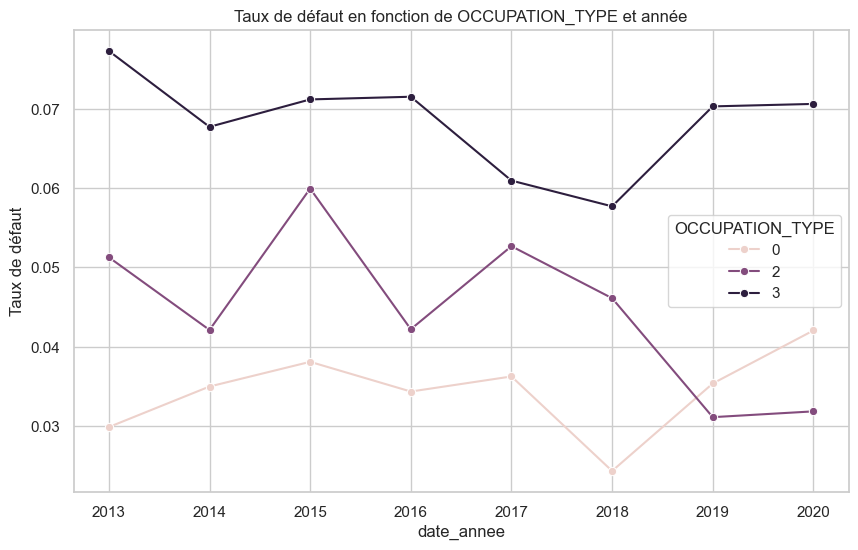

In [64]:
show_risk_stability_overtime(data,"OCCUPATION_TYPE")

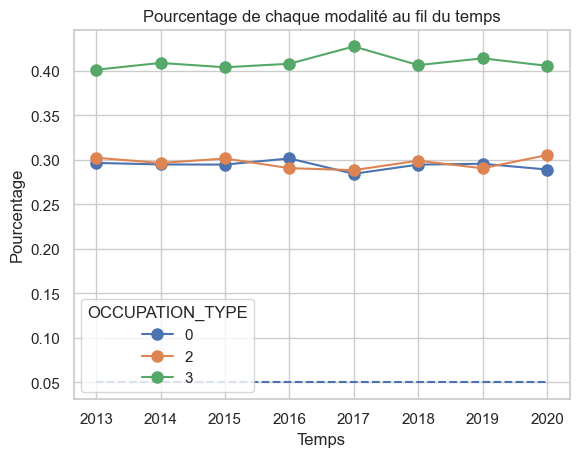

In [65]:
show_volume_stability_overtime(data,"OCCUPATION_TYPE")

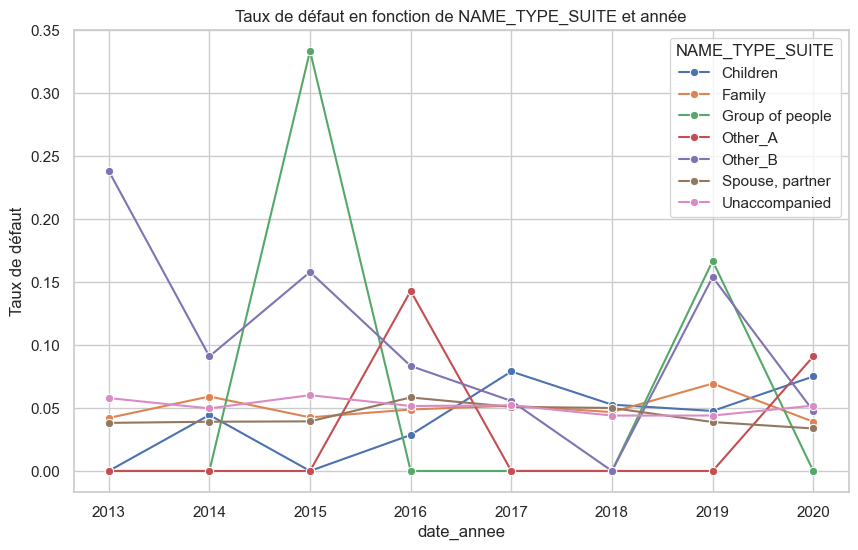

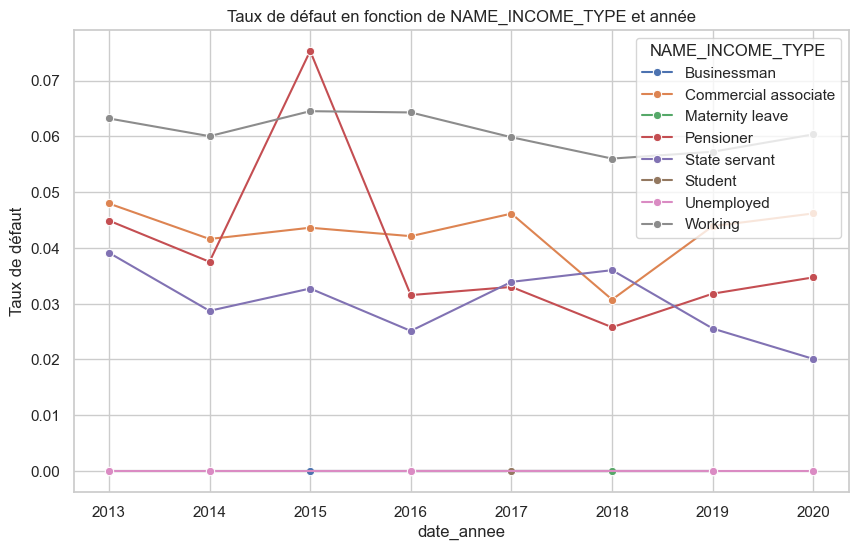

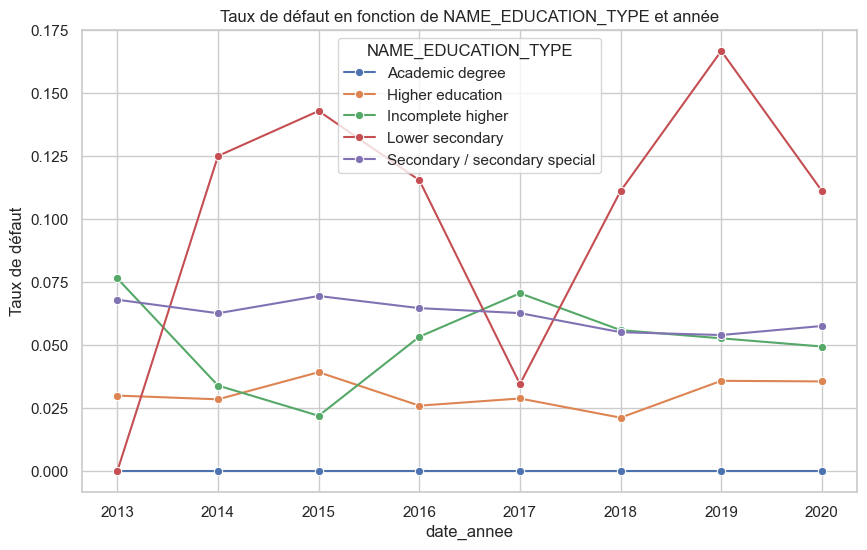

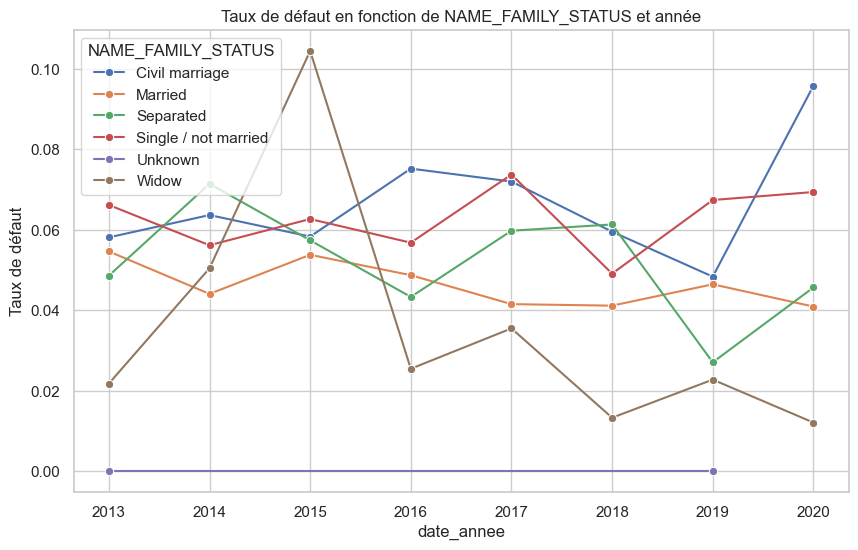

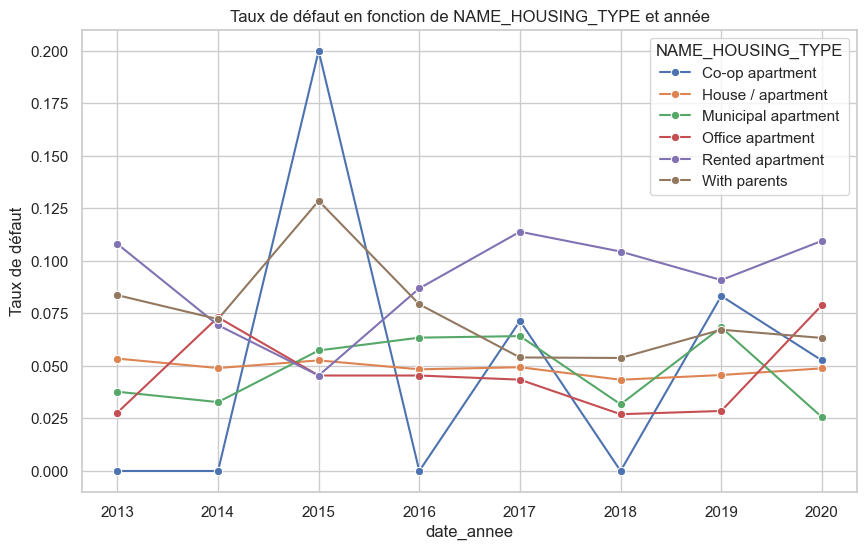

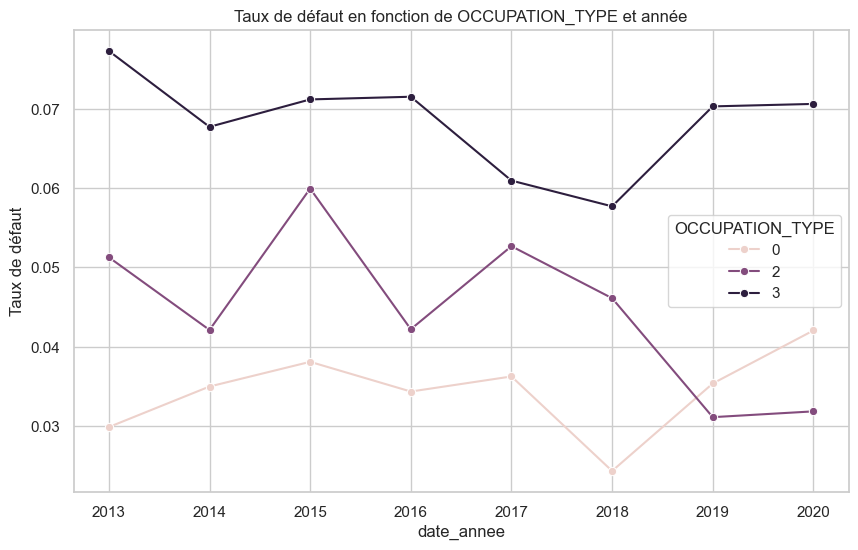

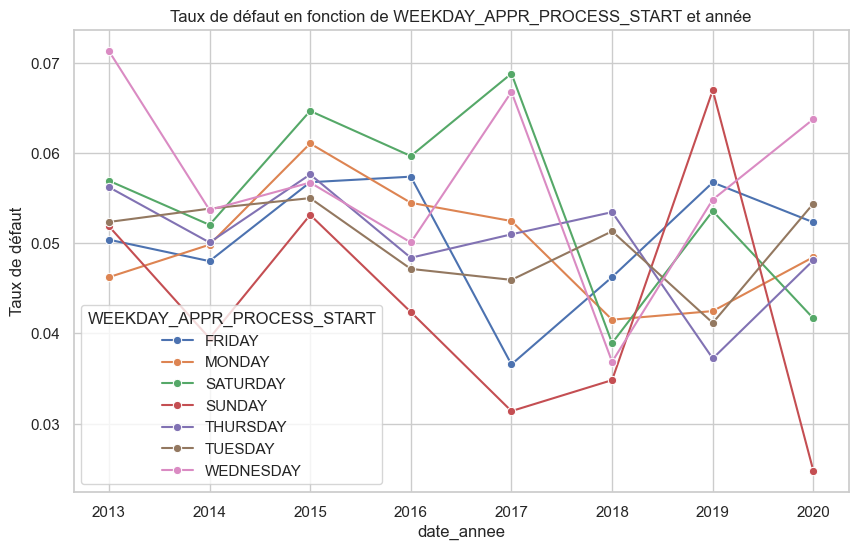

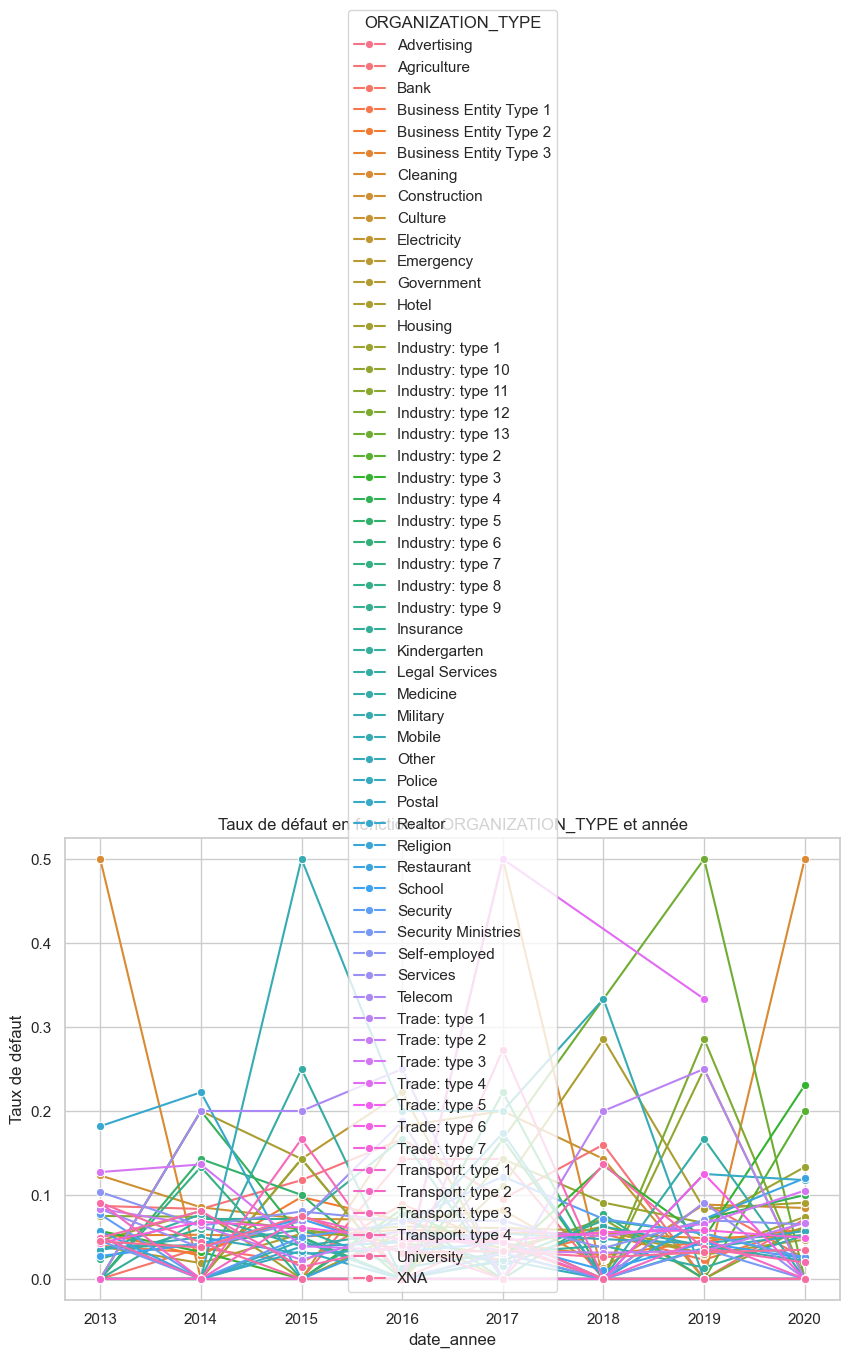

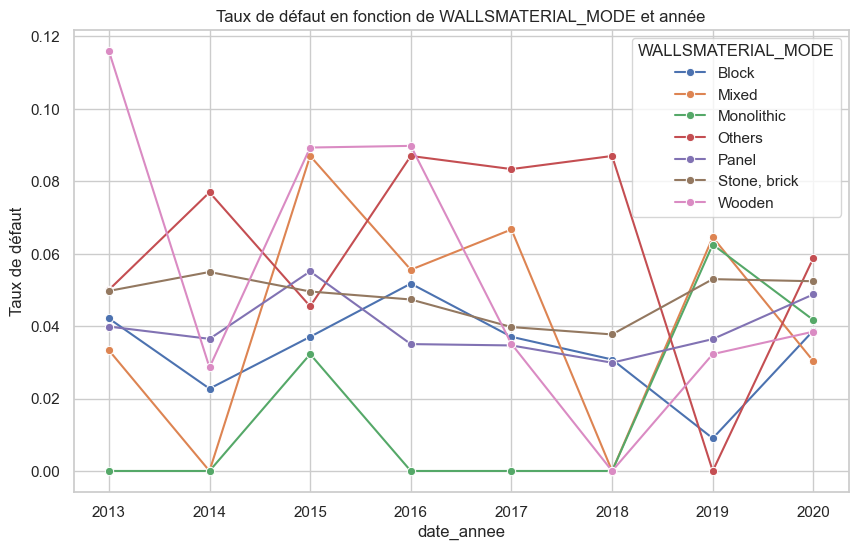

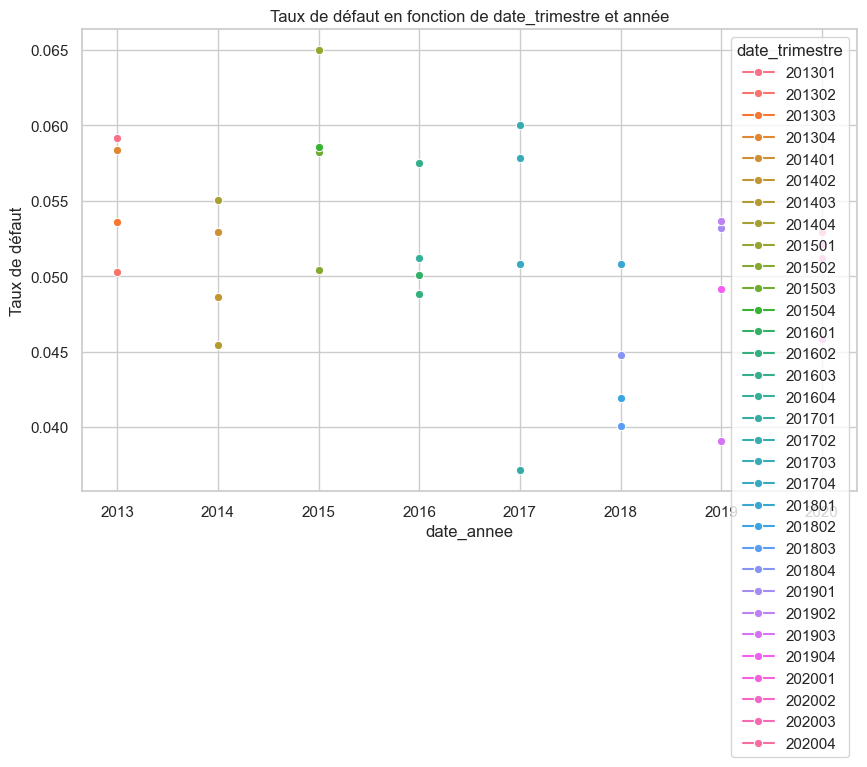

In [66]:
for col in categorical_vars:
    show_risk_stability_overtime(data,col)

In [67]:
group_education_type={
    "Graduated" : ["Academic degree", "Higher education"],
    "Non graduated":["Lower secondary", "Secondary / secondary special", "Incomplete higher"]
}

In [68]:
data["NAME_EDUCATION_TYPE"]=data["NAME_EDUCATION_TYPE"].map({value: key for key, values in group_education_type.items() for value in values})

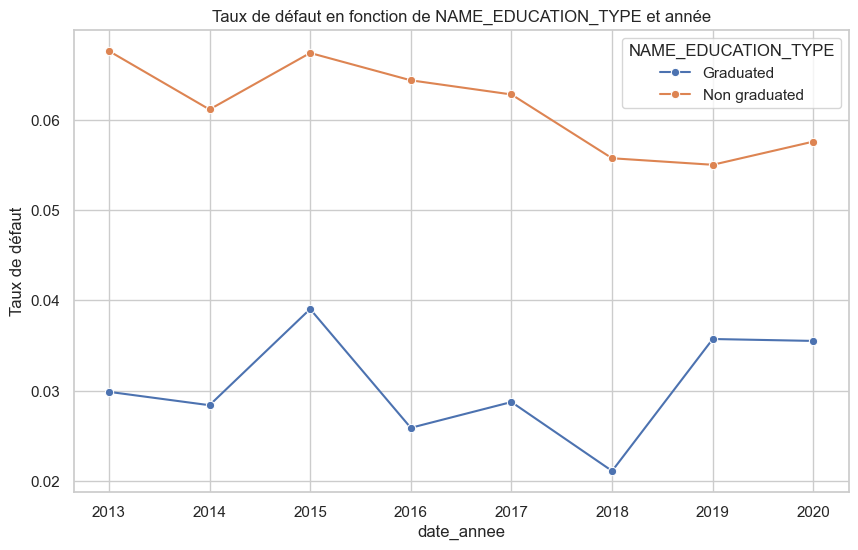

In [69]:
show_risk_stability_overtime(data,"NAME_EDUCATION_TYPE")

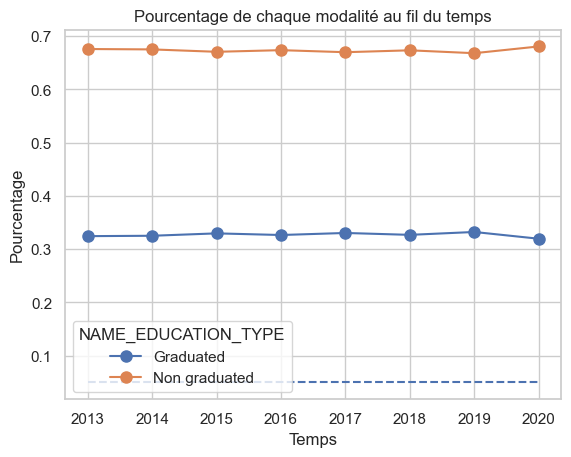

In [70]:
show_volume_stability_overtime(data,"NAME_EDUCATION_TYPE")

In [71]:
group_family_status={
    "Already_Married": ["Civil marriage", "Married","Separated", "Widow"],
    "Single" :["Single / not married", "Unknown"]
    # "Separated": []
}

In [72]:
data["NAME_FAMILY_STATUS_2"]=data["NAME_FAMILY_STATUS"].map({value: key for key, values in group_family_status.items() for value in values})

In [73]:
data["NAME_FAMILY_STATUS"].value_counts(normalize=True)

NAME_FAMILY_STATUS
Married                 0.605307
Single / not married    0.195632
Civil marriage          0.095382
Separated               0.065931
Widow                   0.037680
Unknown                 0.000069
Name: proportion, dtype: float64

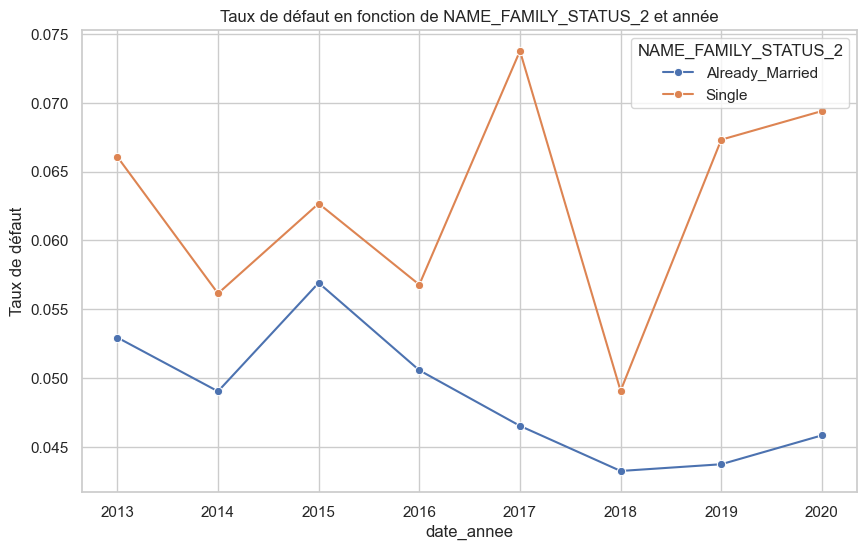

In [74]:
show_risk_stability_overtime(data,"NAME_FAMILY_STATUS_2" )

In [75]:
cramers_v(pd.crosstab(data["HAS_CHILDREN"], data["NAME_FAMILY_STATUS_2"]))

0.20357500953610322

In [76]:
pd.crosstab(data["HAS_CHILDREN"], data["NAME_FAMILY_STATUS_2"])

NAME_FAMILY_STATUS_2  Already_Married  Single
HAS_CHILDREN                                 
N                               14023    4814
Y                                9436     894

In [77]:
data["FAM_STATS_CHILD"]=data["NAME_FAMILY_STATUS_2"]+"-"+"HAS_CHILDREN_"+data["HAS_CHILDREN"] 

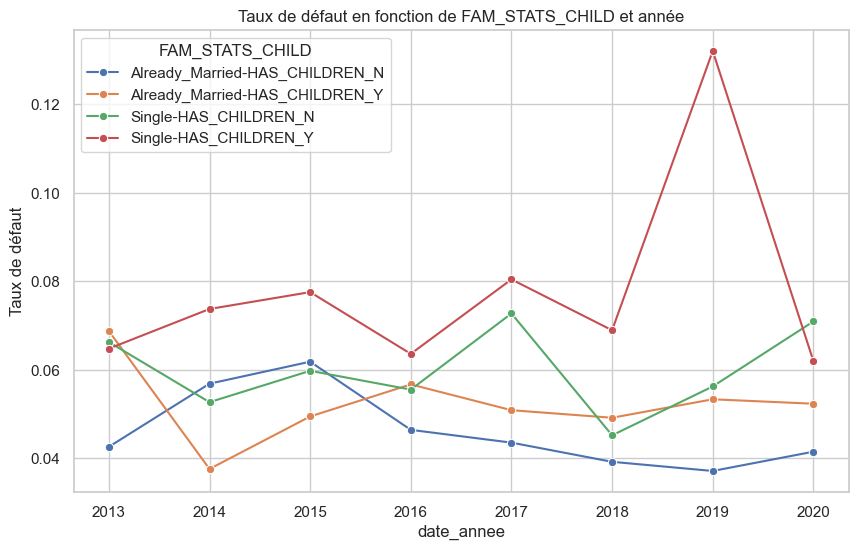

In [78]:
show_risk_stability_overtime(data, "FAM_STATS_CHILD")

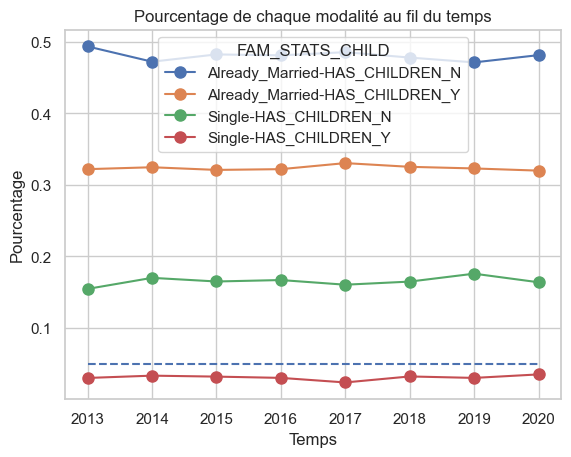

In [79]:
show_volume_stability_overtime(data, "FAM_STATS_CHILD")

In [80]:
data["FAM_STATS_CHILD"].value_counts(normalize=True)

FAM_STATS_CHILD
Already_Married-HAS_CHILDREN_N    0.480783
Already_Married-HAS_CHILDREN_Y    0.323516
Single-HAS_CHILDREN_N             0.165050
Single-HAS_CHILDREN_Y             0.030651
Name: proportion, dtype: float64

In [81]:
data["FAM_STATS_CHILD"]=data["FAM_STATS_CHILD"].apply(lambda x : "Single" if x in ["Single-HAS_CHILDREN_N","Single-HAS_CHILDREN_Y"] else x)

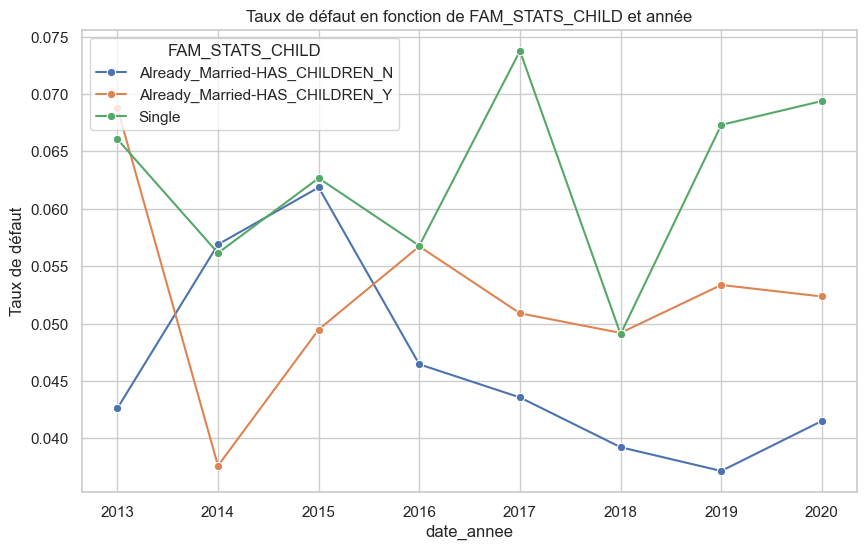

In [82]:
show_risk_stability_overtime(data, "FAM_STATS_CHILD")

In [83]:
cramers_v(pd.crosstab(data["TARGET"], data["NAME_FAMILY_STATUS_2"]))

0.024097595360911512

In [84]:
cramers_v(pd.crosstab(data["TARGET"], data["HAS_CHILDREN"]))

0.00817324060369584

In [85]:
cramers_v(pd.crosstab(data["TARGET"], data["FAM_STATS_CHILD"]))

0.0264729063236335

In [86]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["NAME_FAMILY_STATUS_2"]))

0.011958231541069541

In [87]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["FAM_STATS_CHILD"]))

0.015134354046365203

In [88]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["HAS_CHILDREN"]))

0.002116932893500656

In [89]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["NAME_EDUCATION_TYPE"]))

0.10242570375074476

In [90]:
for col in categorical_vars:
    print(data[[col,"TARGET"]].groupby(by=col).agg(np.mean).sort_values(by="TARGET", ascending=False))
    print(60*"=")

                   TARGET
NAME_TYPE_SUITE          
Other_B          0.101695
Group of people  0.071429
Unaccompanied    0.051429
Family           0.049927
Spouse, partner  0.043803
Children         0.043333
Other_A          0.020000
                        TARGET
NAME_INCOME_TYPE              
Working               0.060678
Commercial associate  0.042848
Pensioner             0.039274
State servant         0.030075
Businessman           0.000000
Maternity leave       0.000000
Student               0.000000
Unemployed            0.000000
                       TARGET
NAME_EDUCATION_TYPE          
Non graduated        0.061478
Graduated            0.030522
                        TARGET
NAME_FAMILY_STATUS            
Civil marriage        0.066499
Single / not married  0.062566
Separated             0.051482
Married               0.046389
Widow                 0.034577
Unknown               0.000000
                       TARGET
NAME_HOUSING_TYPE            
Rented apartment     0.09168

                   TARGET
OCCUPATION_TYPE          
3                0.068342
2                0.044709
0                0.034418
                              TARGET
WEEKDAY_APPR_PROCESS_START          
WEDNESDAY                   0.056727
SATURDAY                    0.054709
FRIDAY                      0.050435
THURSDAY                    0.050242
TUESDAY                     0.050220
MONDAY                      0.049651
SUNDAY                      0.043278
                          TARGET
ORGANIZATION_TYPE               
Trade: type 4           0.200000
Cleaning                0.166667
Industry: type 13       0.125000
Mobile                  0.104167
Hotel                   0.103448
Agriculture             0.100629
Telecom                 0.092593
Industry: type 4        0.081818
Culture                 0.081633
Industry: type 3        0.078767
Construction            0.077287
Trade: type 3           0.075515
Postal                  0.069767
Self-employed           0.069624
Industry:

#### Test de combinaison de variables numériques

In [91]:
social_vars=["OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE"
]

In [92]:
for col in social_vars:
    print(mannwhitney_test(data,col, "TARGET"))

Variable: OBS_30_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 18875082.0
P-value: 0.016395618107139562
None
Variable: DEF_30_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 18512607.5
P-value: 2.4459190694189043e-10
None
Variable: OBS_60_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 18881589.0
P-value: 0.017306285818117082
None
Variable: DEF_60_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 18603412.5
P-value: 4.553714569582653e-11
None
Variable: DAYS_LAST_PHONE_CHANGE
Mann-Whitney U-statistic: 17584124.5
P-value: 4.288003130319745e-23
None


In [93]:
data["DAYS_LAST_PHONE_CHANGE"].fillna(data["DAYS_LAST_PHONE_CHANGE"].min(), inplace=True)

In [94]:
data["AMT_INCOME_TOTAL"].describe()

count    2.916700e+04
mean     1.663270e+05
std      1.261809e+05
min      2.700000e+04
25%      9.900000e+04
50%      1.350000e+05
75%      2.025000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [95]:
data["AMT_CREDIT_TO_INCOME"]=(data["AMT_CREDIT"]+data["CB_AMT_CREDIT_SUM"])/data["AMT_INCOME_TOTAL"]

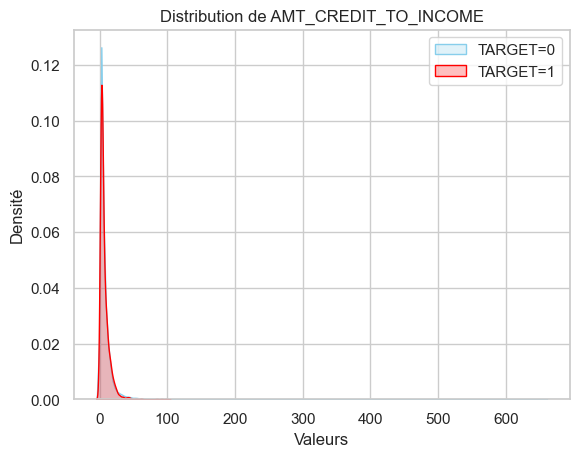

In [96]:
# Plot des distributions kernel pour TARGET==0 et TARGET==1
sns.kdeplot(data.loc[data["TARGET"]==0, "AMT_CREDIT_TO_INCOME"], color='skyblue', label='TARGET=0', fill=True)
sns.kdeplot(data.loc[data["TARGET"]==1, "AMT_CREDIT_TO_INCOME"], color='red', label='TARGET=1', fill=True)

plt.title("Distribution de AMT_CREDIT_TO_INCOME")
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()


In [97]:
median_imputer=SimpleImputer(strategy="median").set_output(transform="pandas")
data["AMT_GOODS_PRICE"]=median_imputer.fit_transform(data["AMT_GOODS_PRICE"].to_numpy().reshape(-1,1))

In [98]:
data["AMT_GOODS_PRICE"].isna().mean()

0.0

In [99]:
data["AMT_GOODS_PRICE"].describe()

count    2.916700e+04
mean     3.254520e+05
std      2.371236e+05
min      4.500000e+04
25%      1.800000e+05
50%      2.700000e+05
75%      3.600000e+05
max      2.250000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [100]:
data["AMT_CREDIT_NORM"]=data["AMT_CREDIT"]/data["AMT_GOODS_PRICE"]
data["AMT_ANNUITY"]=(data["AMT_ANNUITY"]+data["CB_AMT_ANNUITY"])/data["AMT_INCOME_TOTAL"]
data["AMT_INCOME_TOTAL_NORM"]=data["AMT_INCOME_TOTAL"]/data["AMT_GOODS_PRICE"]

In [101]:
data["BORROWER_AGE"]=data["DAYS_BIRTH"].apply(np.abs)//365
data["BORROWER_SENIORITY"]=data["DAYS_EMPLOYED"].apply(np.abs)//365
data["BORROWER_FIDELITY"]=data["DAYS_REGISTRATION"].apply(np.abs)//365

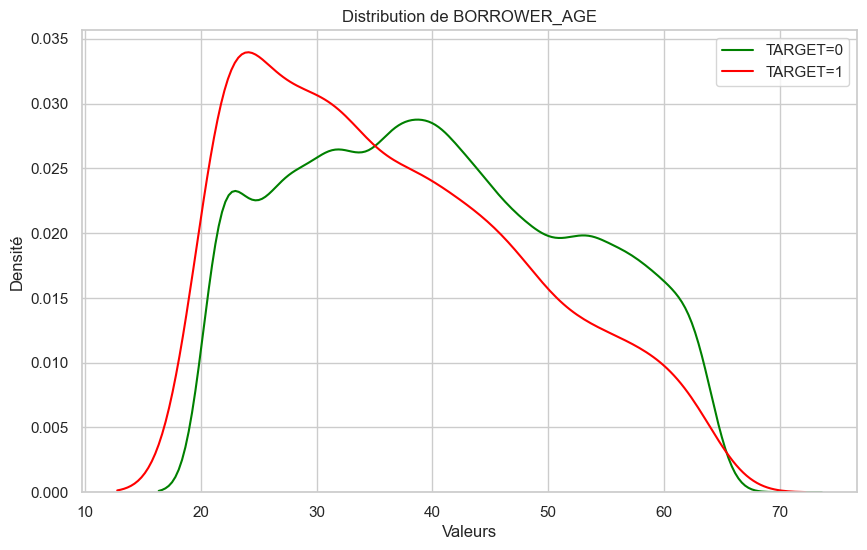

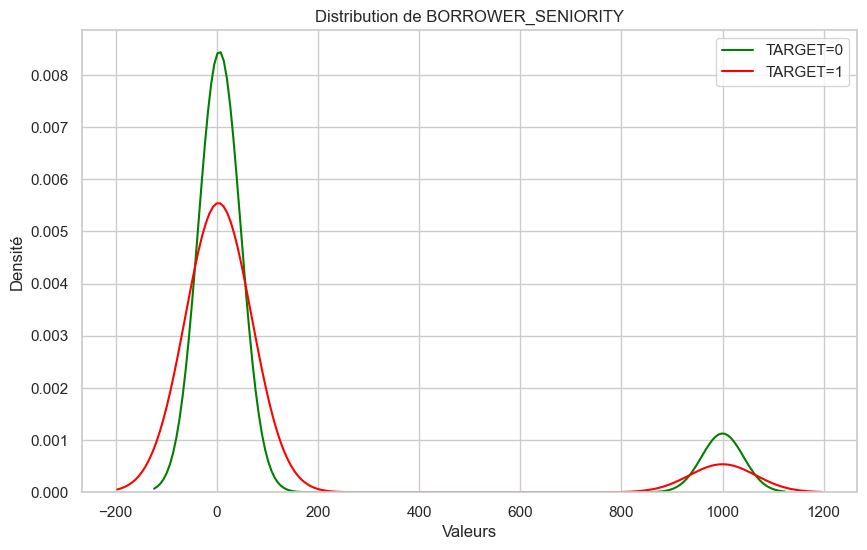

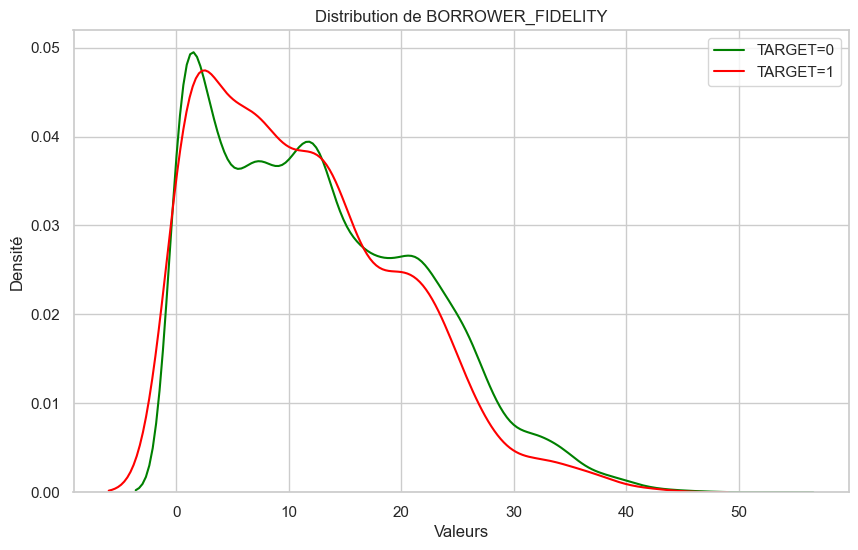

In [102]:
for col in ["BORROWER_AGE","BORROWER_SENIORITY","BORROWER_FIDELITY"]:
    plt.figure(figsize=(10, 6))
    # Plot des distributions kernel pour TARGET==0 et TARGET==1
    sns.kdeplot(data.loc[data["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
    sns.kdeplot(data.loc[data["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

    plt.title(f"Distribution de {col}")
    plt.xlabel('Valeurs')
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

In [103]:
data["BORROWER_SENIORITY"].quantile(q=0.8)

13.0

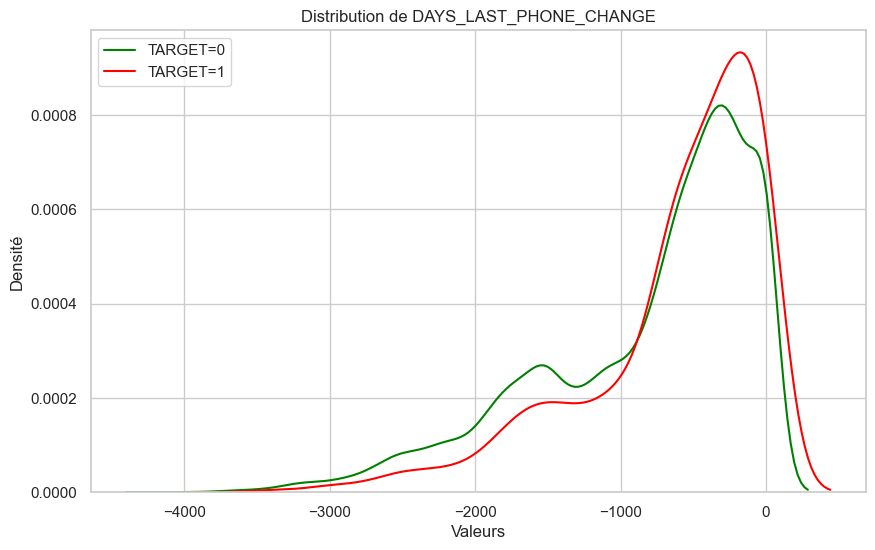

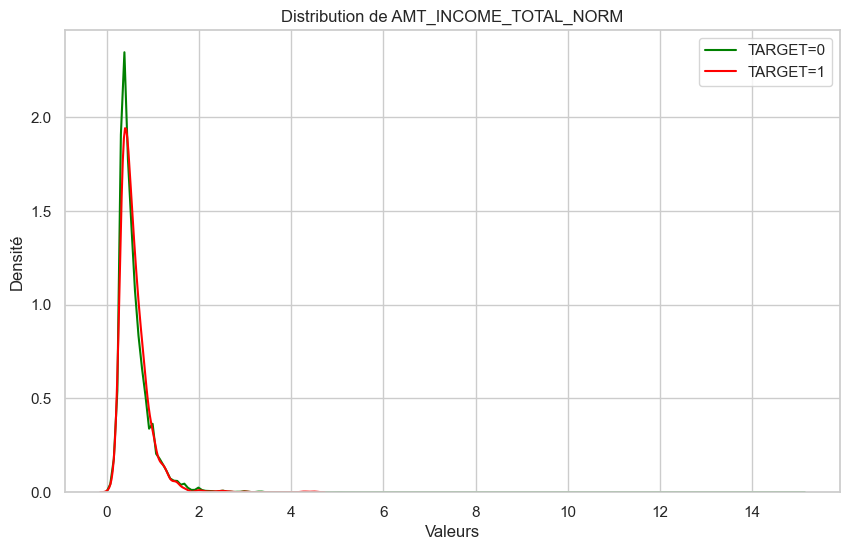

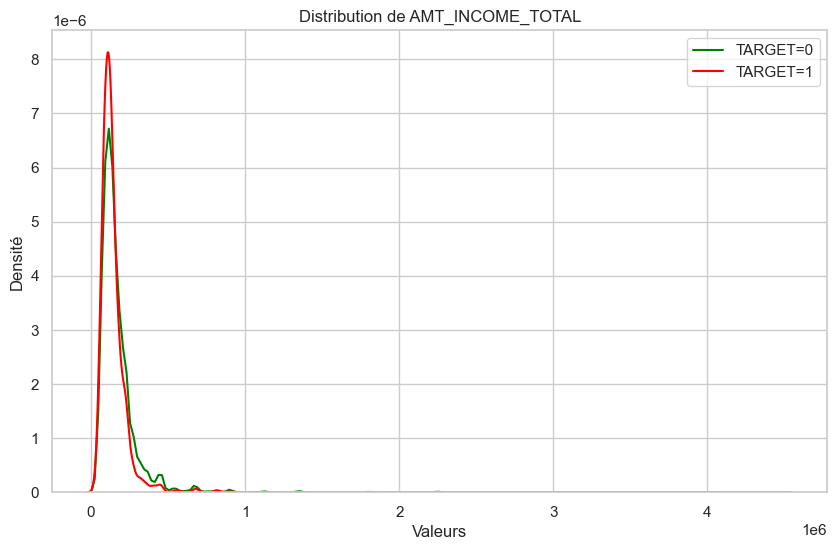

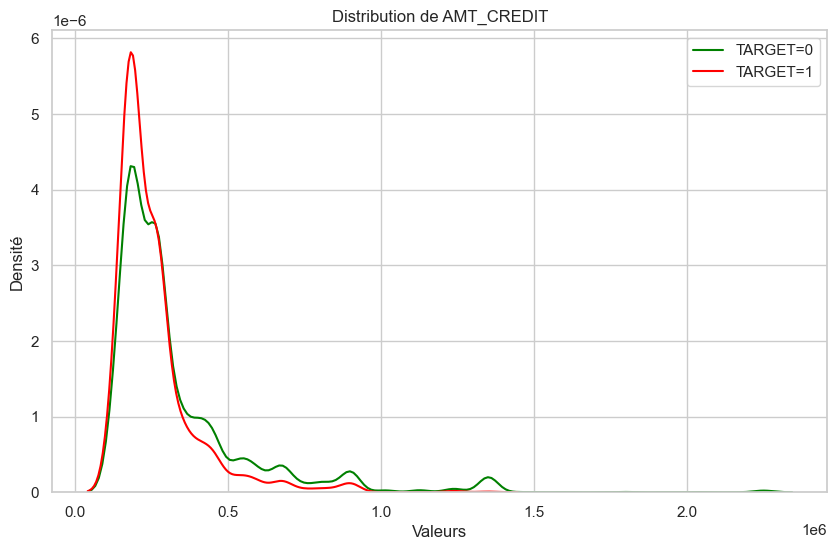

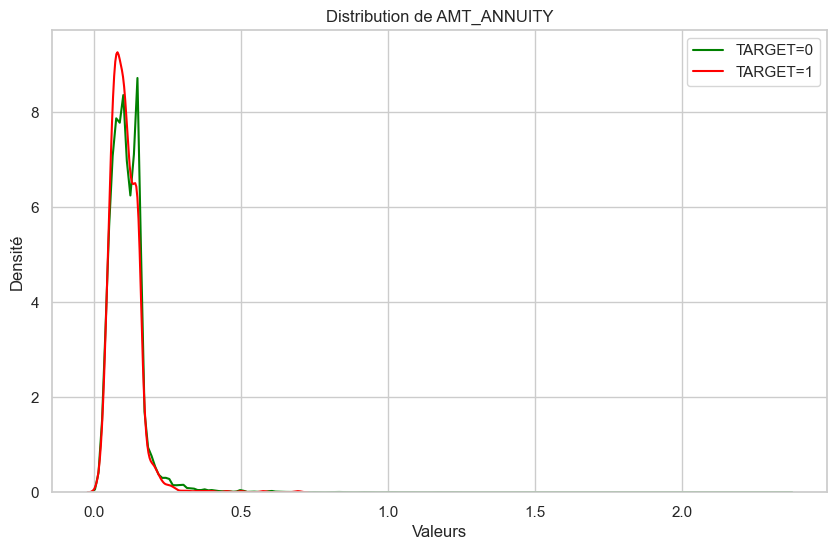

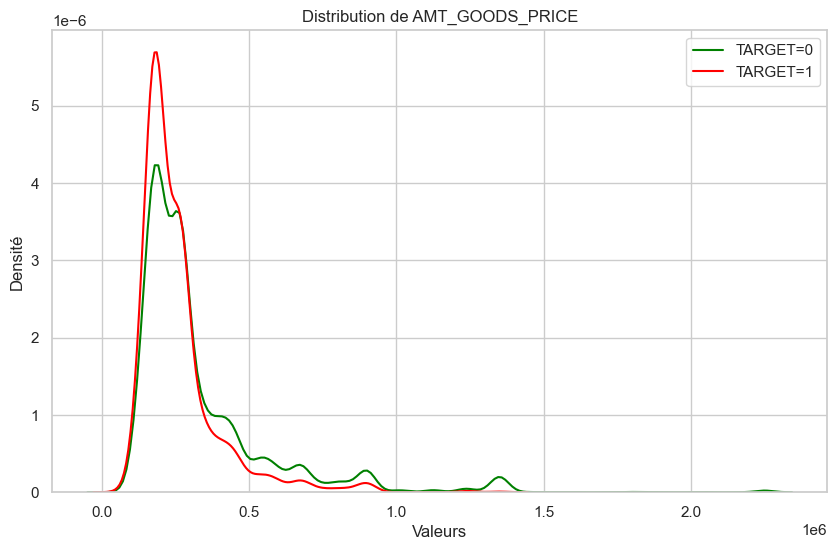

In [104]:
for col in ["DAYS_LAST_PHONE_CHANGE","AMT_INCOME_TOTAL_NORM", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]:
    plt.figure(figsize=(10, 6))
    # Plot des distributions kernel pour TARGET==0 et TARGET==1
    sns.kdeplot(data.loc[data["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
    sns.kdeplot(data.loc[data["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

    plt.title(f"Distribution de {col}")
    plt.xlabel('Valeurs')
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

#### Test de rang des variables numériques ? 

In [105]:
numerical_vars=[var for var in numerical_vars if (var not in binary_vars)& (var not in low_category_categorical_vars)]

In [106]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YE

In [107]:
data["CNT_FAM_MEMBERS"].value_counts(normalize=True)

CNT_FAM_MEMBERS
2.0     0.455477
1.0     0.239534
3.0     0.201680
4.0     0.089251
5.0     0.012344
6.0     0.001474
7.0     0.000171
14.0    0.000034
8.0     0.000034
Name: proportion, dtype: float64

In [108]:
data[['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count                24915.000000               24915.000000                24915.000000               24915.000000               24915.000000                24915.000000
mean                     0.006542                   0.005258                    0.024724                   0.226851                   0.211640                    1.595304
std                      0.084034                   0.081703                    0.165302                   0.874198                   0.558995                    1.798406
min                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000
75%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    2.000000
max                      2.000000                   4.000000                    6.000000                  18.000000                   8.000000                   16.000000

In [109]:
tested_numerical_variables=[
    "BORROWER_AGE","BORROWER_SENIORITY","BORROWER_FIDELITY","AMT_INCOME_TOTAL_NORM",
    "AMT_CREDIT_NORM", "AMT_INCOME_TOTAL","AMT_CREDIT",
    "AMT_ANNUITY","AMT_GOODS_PRICE",
    'CB_AMT_CREDIT_SUM_DEBT', 'CB_NB_CREDIT_ACTIVE', 'CB_NB_CREDIT_CLOSED', 'CB_DAYS_CREDIT', 'CB_DAYS_CREDIT_ENDDATE', 'CB_AMT_CREDIT_SUM', 'CB_AMT_ANNUITY'
] 

In [110]:
for col in tested_numerical_variables:
    mannwhitney_test(data,col,"TARGET")

Variable: BORROWER_AGE
Mann-Whitney U-statistic: 24539354.5
P-value: 2.6666242676034856e-33


Variable: BORROWER_SENIORITY
Mann-Whitney U-statistic: 24743701.5
P-value: 4.673448298137193e-37
Variable: BORROWER_FIDELITY
Mann-Whitney U-statistic: 22270539.0
P-value: 1.085103099413983e-06
Variable: AMT_INCOME_TOTAL_NORM
Mann-Whitney U-statistic: 19397106.0
P-value: 2.850009643307312e-05
Variable: AMT_CREDIT_NORM
Mann-Whitney U-statistic: 20758014.5
P-value: 0.6508778320212891
Variable: AMT_INCOME_TOTAL
Mann-Whitney U-statistic: 23793395.5
P-value: 3.011509974870752e-22
Variable: AMT_CREDIT
Mann-Whitney U-statistic: 24532928.0
P-value: 9.351395701337114e-34
Variable: AMT_ANNUITY
Mann-Whitney U-statistic: 22117568.5
P-value: 1.1092315633274533e-05
Variable: AMT_GOODS_PRICE
Mann-Whitney U-statistic: 24526389.0
P-value: 1.1572837883737835e-33
Variable: CB_AMT_CREDIT_SUM_DEBT
Mann-Whitney U-statistic: 19954470.5
P-value: 0.012098735116348229
Variable: CB_NB_CREDIT_ACTIVE
Mann-Whitney U-statistic: 20059426.0
P-value: 0.03137144448647952
Variable: CB_NB_CREDIT_CLOSED
Mann-Whitney U-stati

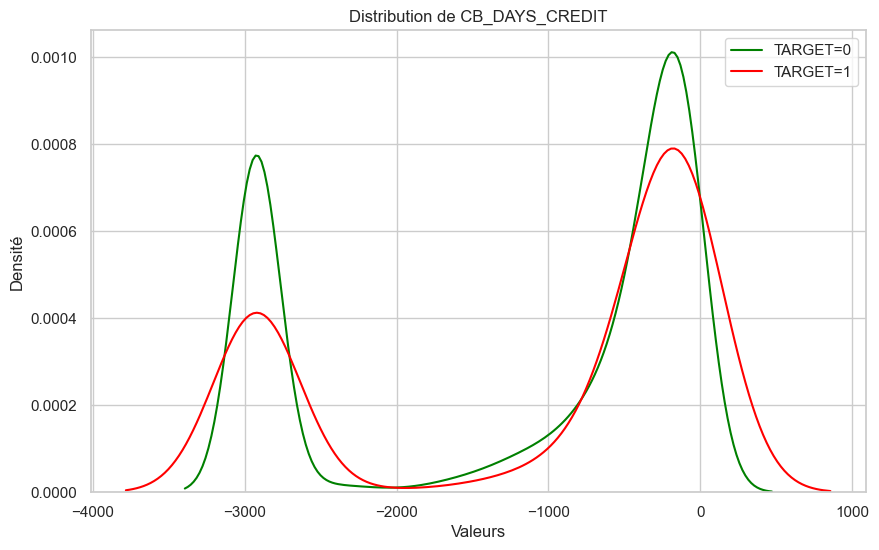

In [111]:
col="CB_DAYS_CREDIT"
plt.figure(figsize=(10, 6))
# Plot des distributions kernel pour TARGET==0 et TARGET==1
sns.kdeplot(data.loc[data["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
sns.kdeplot(data.loc[data["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

plt.title(f"Distribution de {col}")
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()

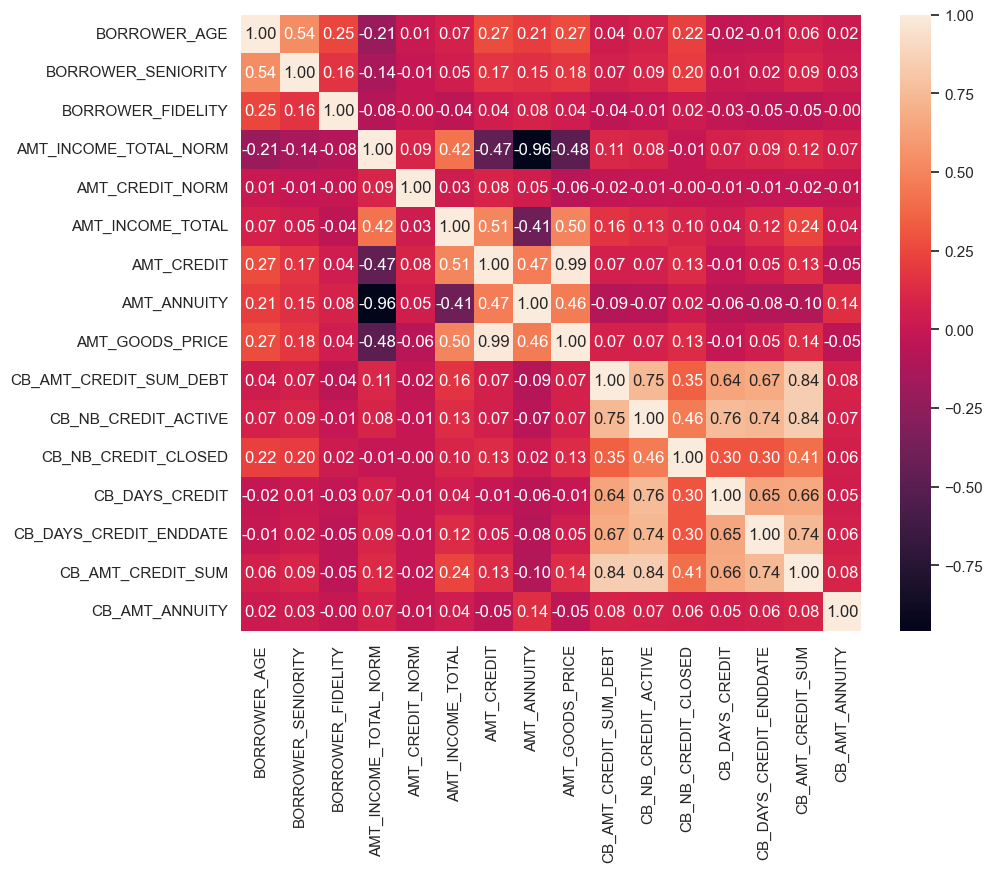

In [112]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data[tested_numerical_variables].corr(method="spearman"), annot=True,fmt=".2f")
plt.show()

In [113]:
# tested_numerical_variables.remove("AMT_ANNUITY")

In [114]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

class DecisionTreeDiscretizer:
    def __init__(self, max_bins=5, target=None):
        self.tree_max_bins = max_bins
        self.clf = DecisionTreeClassifier(criterion="gini", max_depth=int(round(self.tree_max_bins/2)),
                                           min_samples_leaf=0.05,
                                           class_weight=None) #
        self.target = target
        

    def fit(self, X_train):
        # Entraîner le modèle sur les données d'entraînement
        self.clf.fit(X_train.values.reshape(-1, 1), self.target)

    def _get_tree_thresholds(self):
        thresholds = set()
        for node in range(self.clf.tree_.node_count):
            if self.clf.tree_.children_left[node] != self.clf.tree_.children_right[node]:  # non-leaf node
                feature = self.clf.tree_.feature[node]
                threshold = self.clf.tree_.threshold[node]
                thresholds.add(threshold)
        return np.array(list(thresholds))

    def get_thresholds(self):
        if hasattr(self.clf, 'tree_') and self.clf.tree_ is not None:
            thresholds_np = self._get_tree_thresholds()
            thresholds = [-np.inf] + sorted(list(set(list(thresholds_np)))) + [np.inf]
            return thresholds
        else:
            raise ValueError("Le classifieur n'est pas entraîné. Utilisez la méthode fit avant d'obtenir les seuils.")

    def transform(self, X):
        # Vérifier si le modèle est entraîné
        if not hasattr(self.clf, 'tree_') or self.clf.tree_ is None:
            raise ValueError("Le classifieur n'est pas entraîné. Utilisez la méthode fit avant de transformer les données de test.")

        thresholds = self.get_thresholds()

        # Utiliser pd.cut pour obtenir les intervalles au lieu des numéros
        intervals = pd.cut(X.values.flatten(), bins=thresholds, include_lowest=True, right=True)
        return intervals

In [115]:
data["AMT_GOODS_PRICE"].isna().mean()

0.0

In [116]:
data["AMT_CREDIT_NORM"].isna().mean()

0.0

In [117]:
data[binary_vars+low_category_categorical_vars]=data[binary_vars+low_category_categorical_vars].astype("category")

In [118]:
for col in binary_vars:
    print(f"{col} IV {calculate_information_value_from_contingency_table(pd.crosstab(data['TARGET'], data[col]))}")
    print( 60*"*")

FLAG_EMP_PHONE IV 0.008919363509396094
************************************************************
FLAG_WORK_PHONE IV 0.025018443537469928
************************************************************


FLAG_PHONE IV 0.0003080625887363791
************************************************************
REG_CITY_NOT_LIVE_CITY IV 0.02378935970680486
************************************************************
REG_CITY_NOT_WORK_CITY IV 0.026008637452337155
************************************************************
LIVE_CITY_NOT_WORK_CITY IV 0.00608002796658863
************************************************************


In [119]:
for col in low_category_categorical_vars:
    print(f"{col} IV {calculate_information_value_from_contingency_table(pd.crosstab(data['TARGET'], data[col]))}")
    print( 60*"*")

CODE_GENDER IV 0.0029004829562603563
************************************************************


FLAG_OWN_CAR IV 0.013735239315902283
************************************************************
HAS_CHILDREN IV 0.002116932893500656
************************************************************
REGION_RATING_CLIENT IV 0.07086914622195309
************************************************************
REGION_RATING_CLIENT_W_CITY IV 0.07471395134629588
************************************************************
AMT_REQ_CREDIT_BUREAU_HOUR IV inf
************************************************************
AMT_REQ_CREDIT_BUREAU_DAY IV inf
************************************************************


In [120]:
def group_days_credit(days):
    if (np.abs(days) < 365) :
        return "< 1 YEAR"
    elif (np.abs(days) >= 365) & (np.abs(days) <365*2):
        return "BETWEEN 1-2 YEAR"
    elif (np.abs(days) >= 365*2) :
        return "MORE THAN 2 YEARs"
    

In [121]:
def group_number_credit(nb):
    if nb <=2 :
        return "2 OR LESS"
    elif (nb > 2) & (nb <=4):
        return "3 OR 4"
    else:
        return "5 OR MORE"

In [122]:
# data["CB_NB_CREDIT_ACTIVE"]=data["CB_NB_CREDIT_ACTIVE"].apply(group_number_credit)

In [123]:
# data["CB_NB_CREDIT_ACTIVE"].value_counts()

In [124]:
# data["CB_DAYS_CREDIT"]=data["CB_DAYS_CREDIT"].apply(group_days_credit)

In [125]:
# data["CB_NB_ACTIVE_CREDIT_DAYS_LAST"]=data["CB_NB_CREDIT_ACTIVE"] + "-" + data["CB_DAYS_CREDIT"]

In [126]:
# show_risk_stability_overtime(data,"CB_DAYS_CREDIT")

In [127]:
# calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"],data["CB_DAYS_CREDIT"]))

In [128]:
import statsmodels.api as sm
data_train, data_test=train_test_split(data, test_size=0.3, stratify=data["TARGET"], random_state=42)

In [129]:
discretised_cols=["AMT_INCOME_TOTAL_NORM", "AMT_CREDIT_TO_INCOME" , "BORROWER_AGE", "BORROWER_SENIORITY",
                  "BORROWER_FIDELITY", "AMT_CREDIT_NORM", "DAYS_LAST_PHONE_CHANGE"
                  ]
discretised_cols_2=["AMT_ANNUITY","AMT_GOODS_PRICE", "CB_DAYS_CREDIT",
                  'CB_AMT_CREDIT_SUM_DEBT', 'CB_NB_CREDIT_CLOSED', 
                  'CB_DAYS_CREDIT_ENDDATE', 'CB_AMT_CREDIT_SUM', 'CB_AMT_ANNUITY'
]

In [130]:
dt_discretizer=DecisionTreeDiscretizer(target=data_train["TARGET"])

for col in discretised_cols:
    dt_discretizer.fit(data_train[col])
    data_train[col]=dt_discretizer.transform(data_train[col])
    data_test[col]=dt_discretizer.transform(data_test[col])

In [131]:
dt_discretizer=DecisionTreeDiscretizer(target=data_train["TARGET"])

for col in discretised_cols_2:
    dt_discretizer.fit(data_train[col])
    data_train[col]=dt_discretizer.transform(data_train[col])
    data_test[col]=dt_discretizer.transform(data_test[col])

In [132]:
calculate_information_value_from_contingency_table(pd.crosstab(data_train["TARGET"], data_train["DAYS_LAST_PHONE_CHANGE"]))

0.0871040272567881

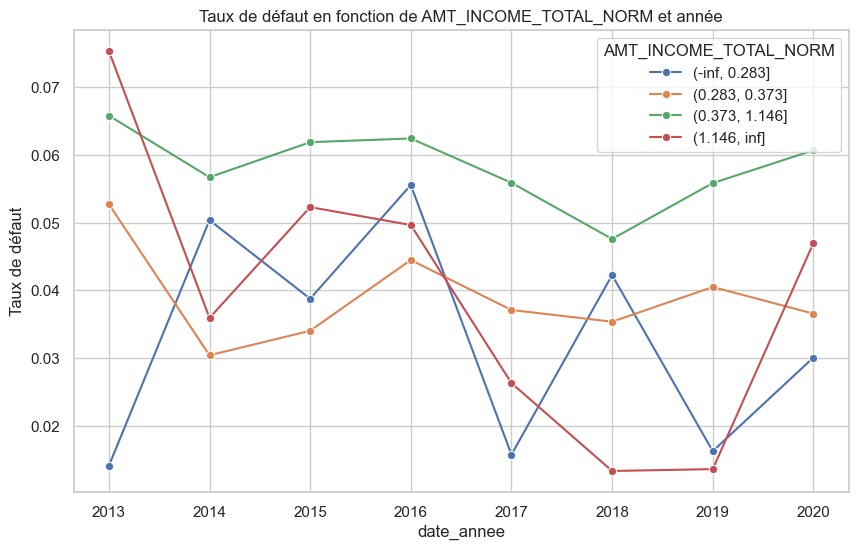

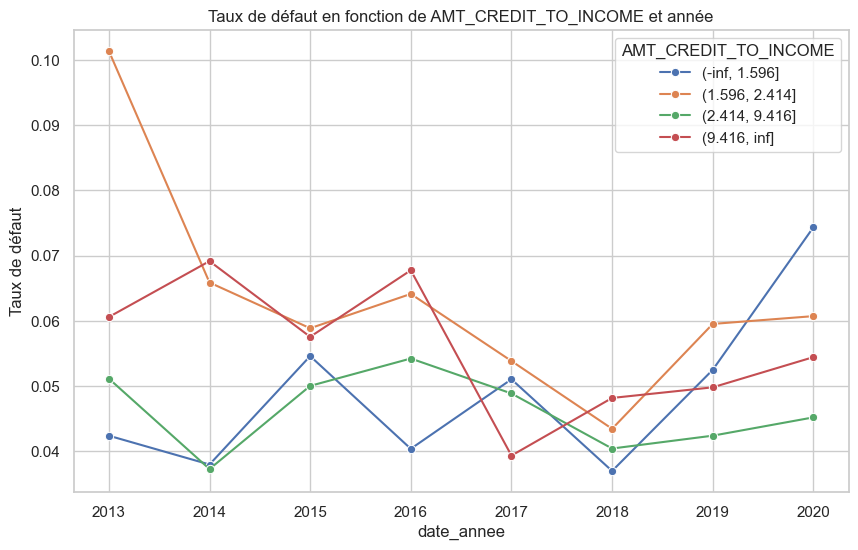

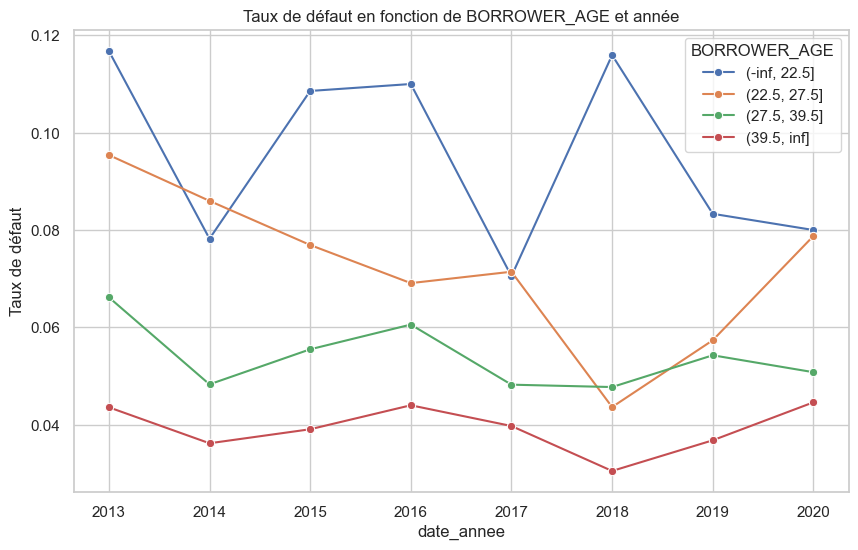

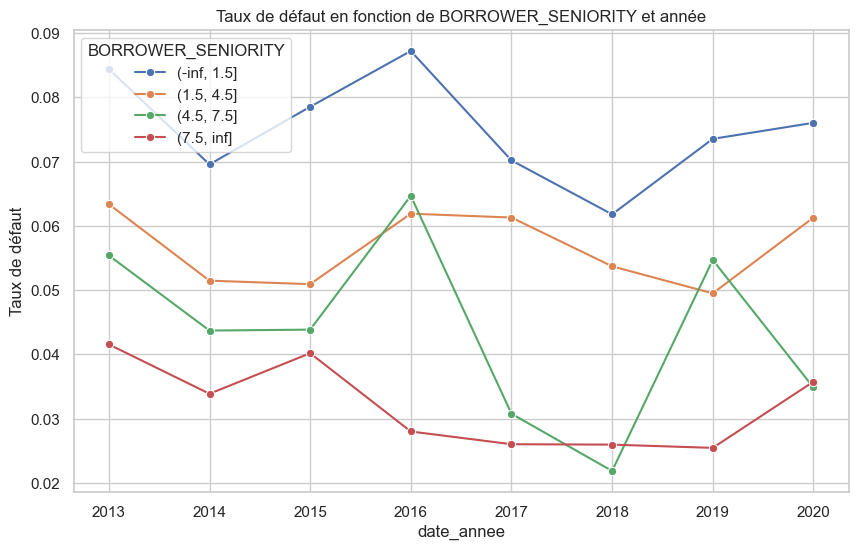

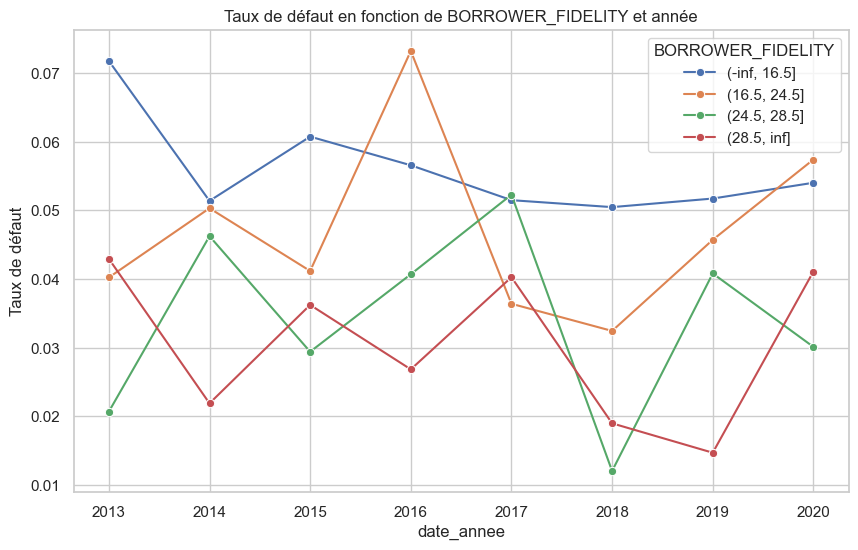

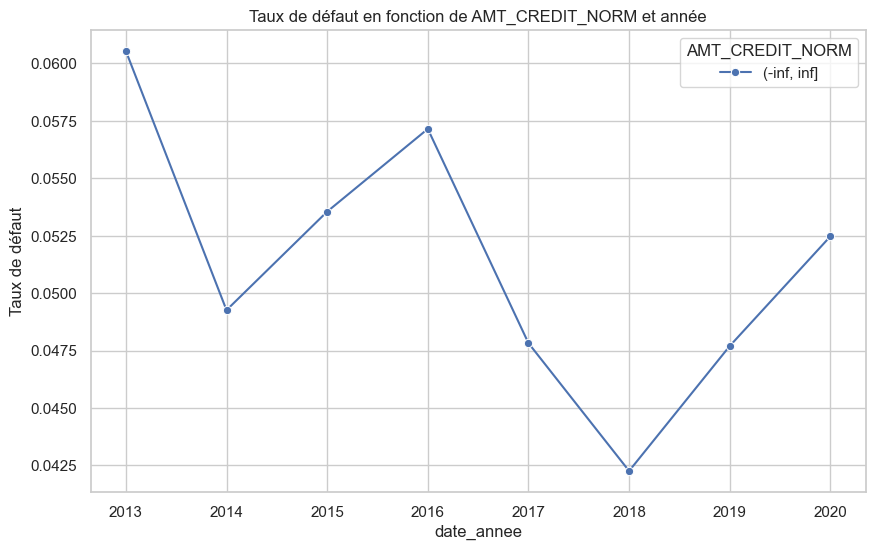

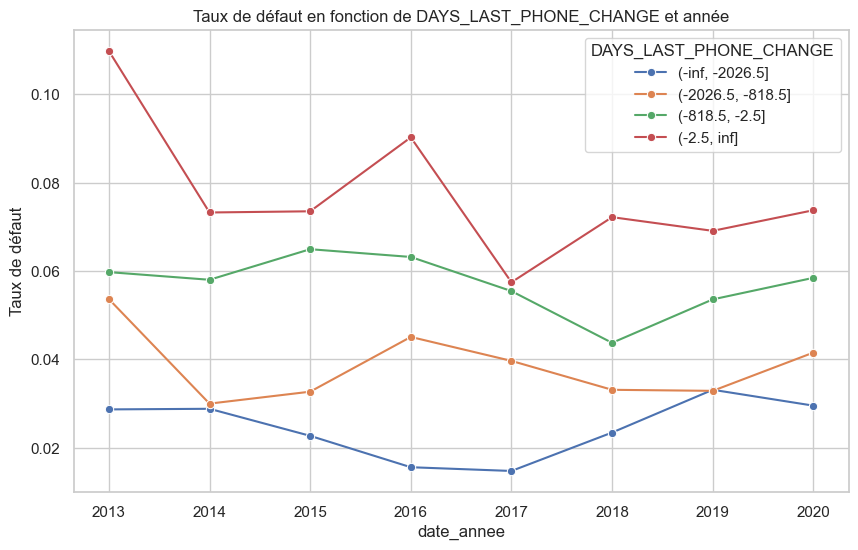

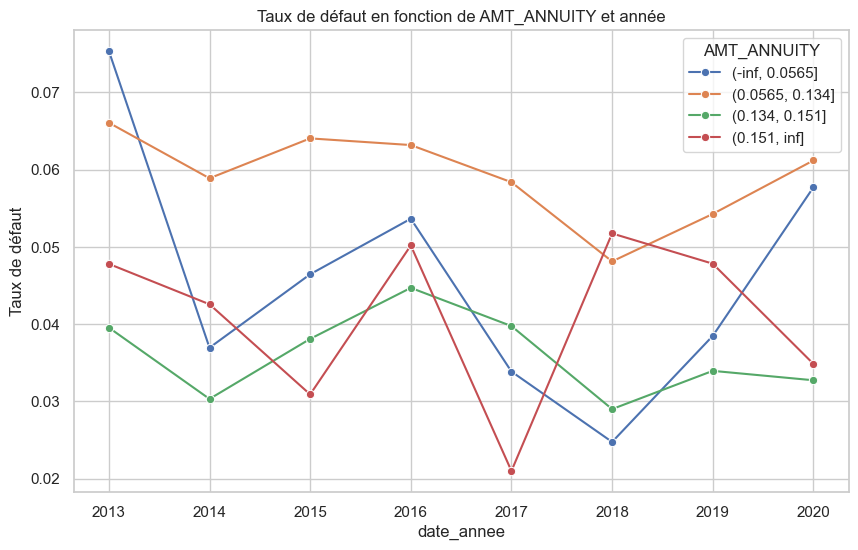

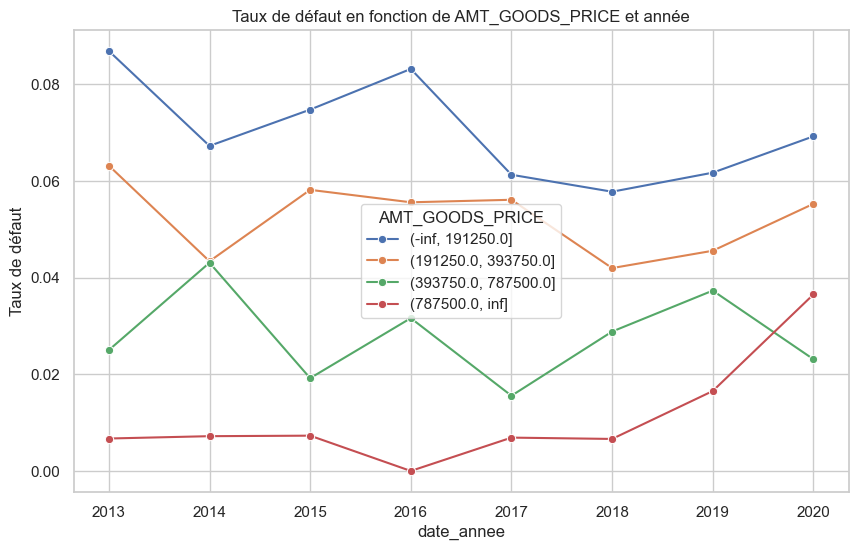

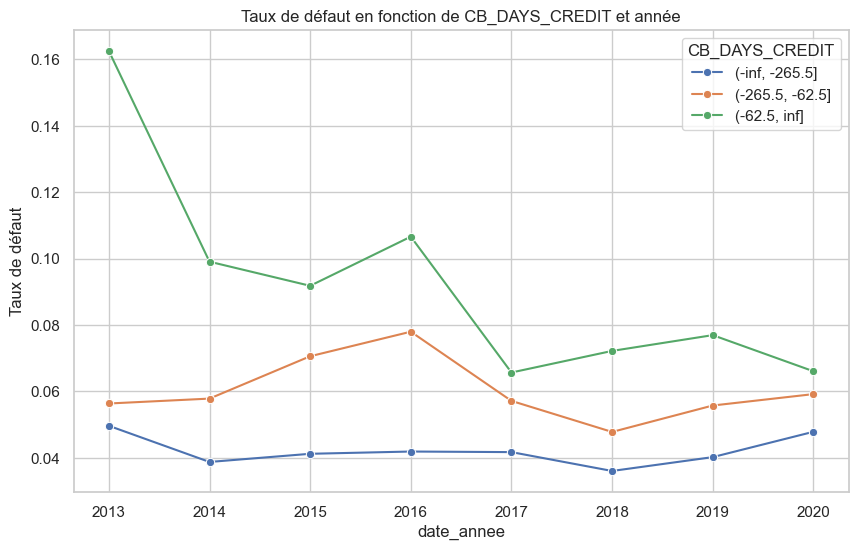

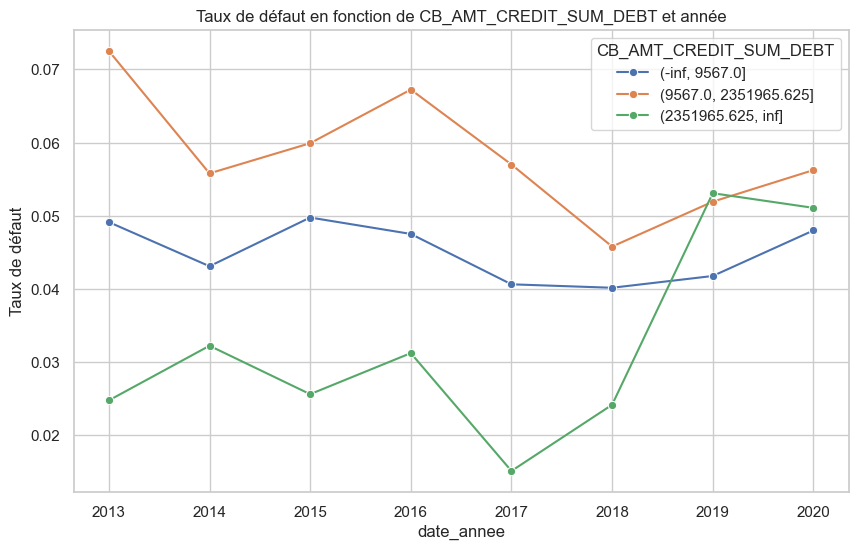

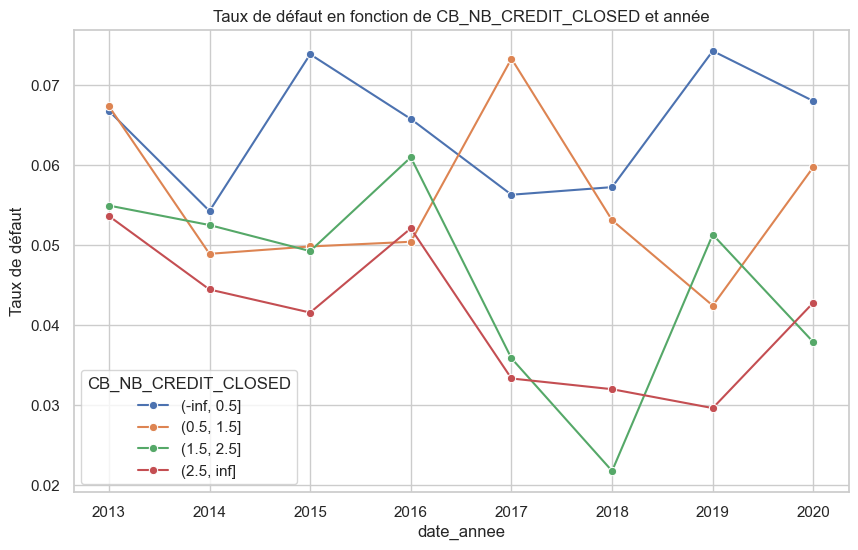

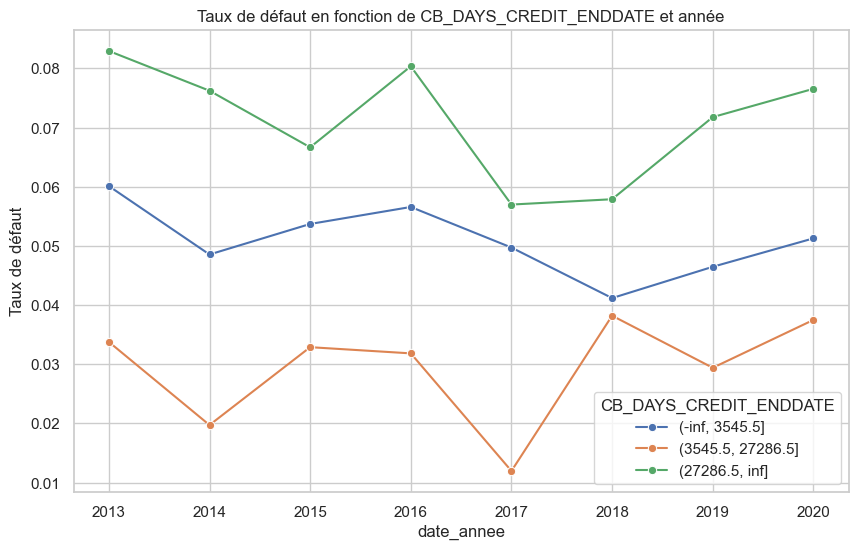

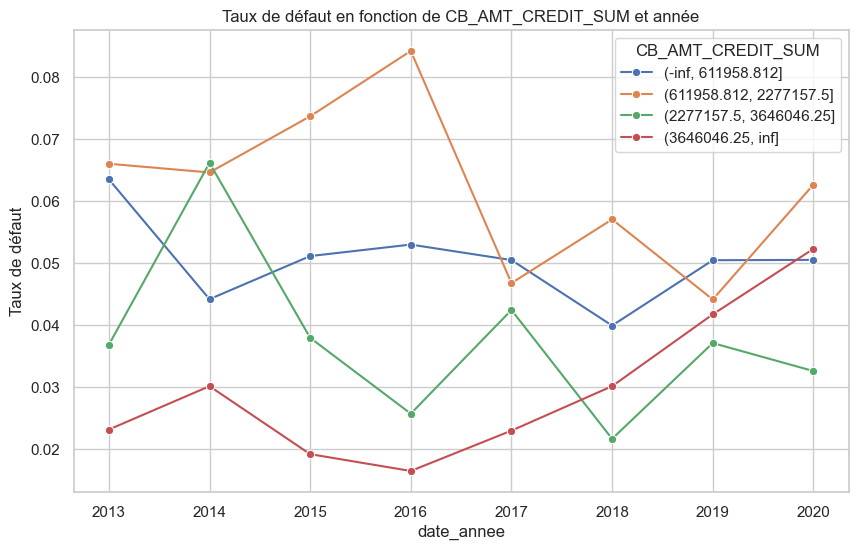

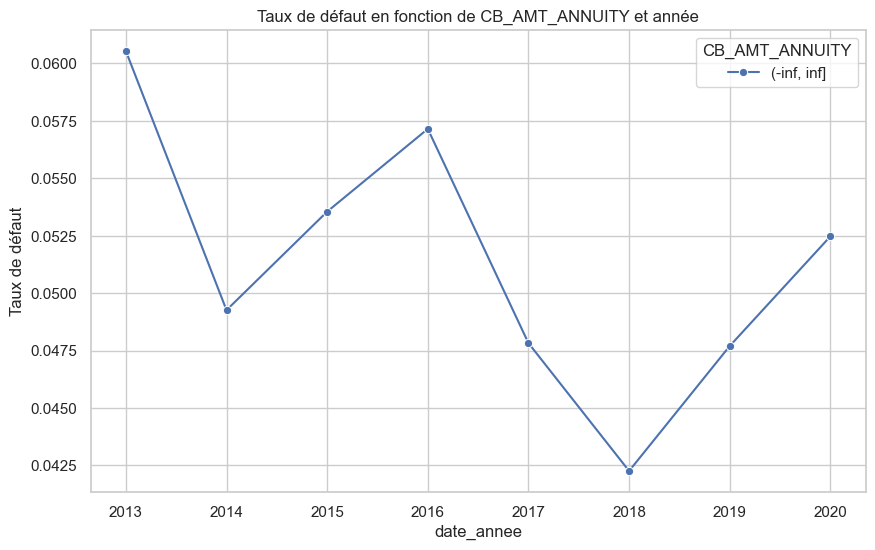

In [133]:
for col in discretised_cols+discretised_cols_2:
    show_risk_stability_overtime(data_train,col)

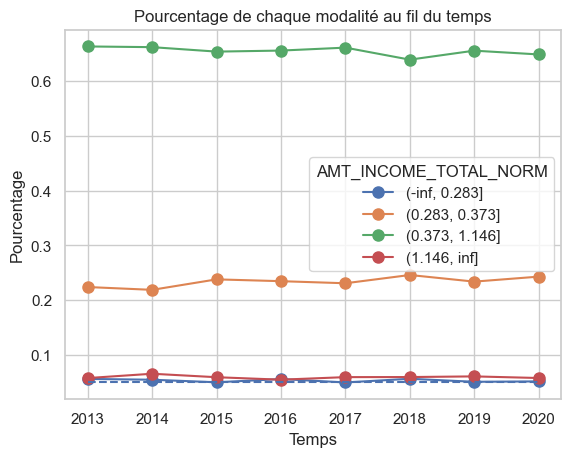

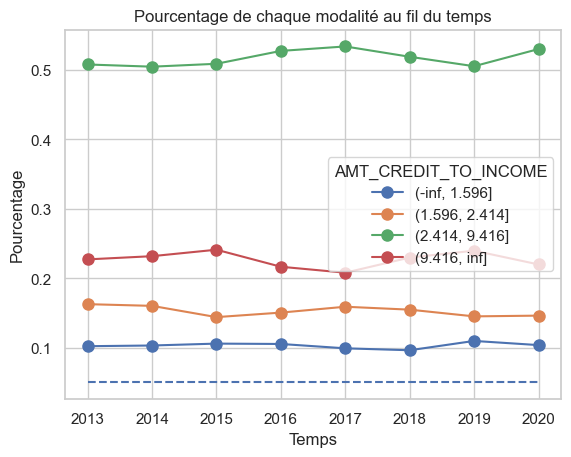

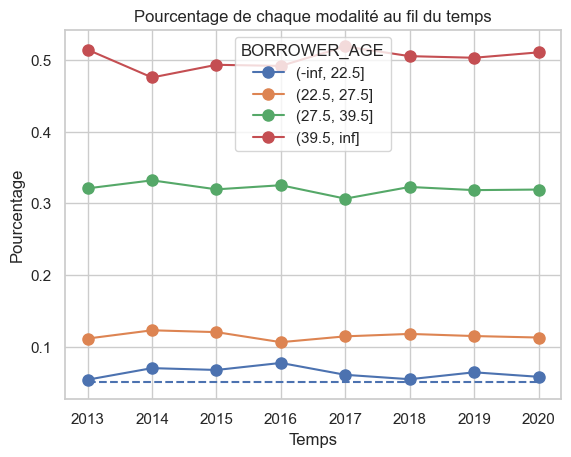

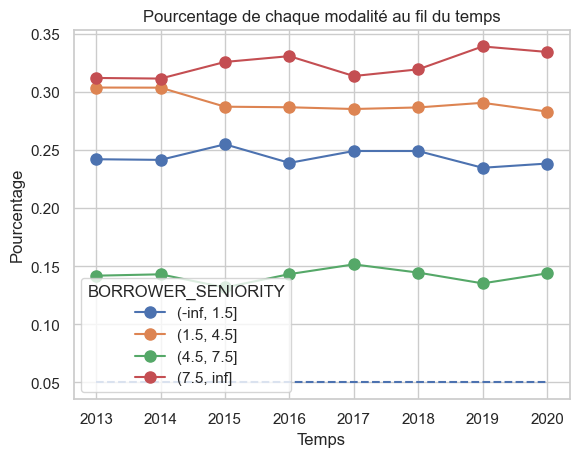

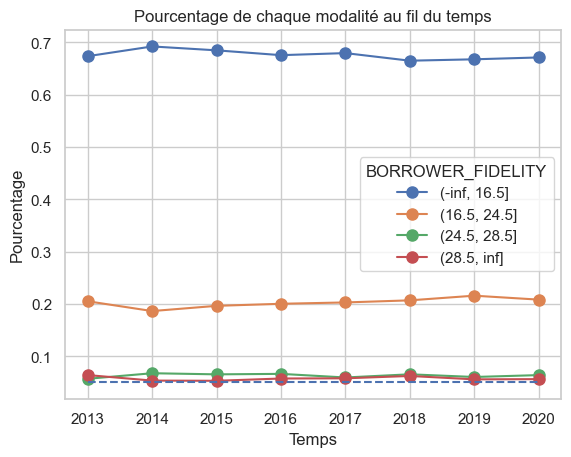

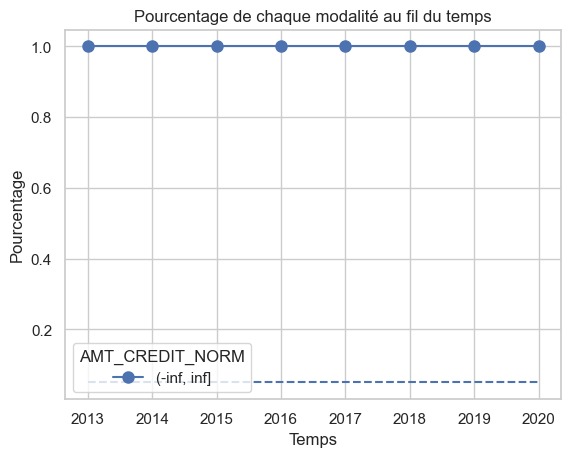

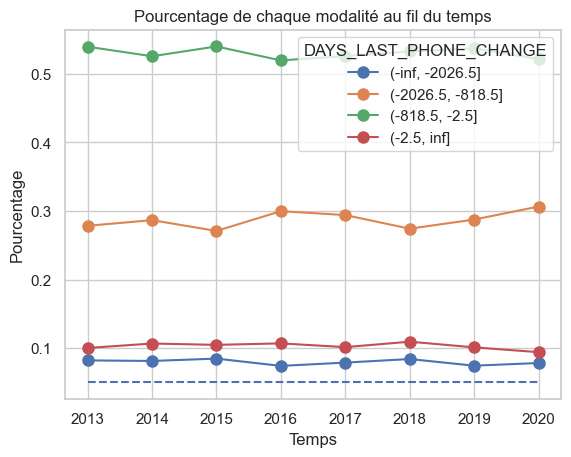

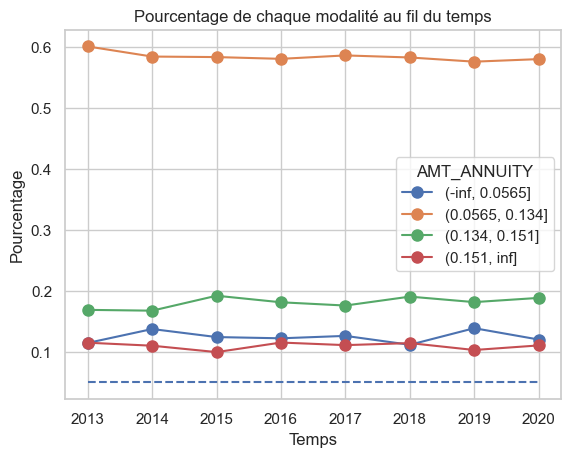

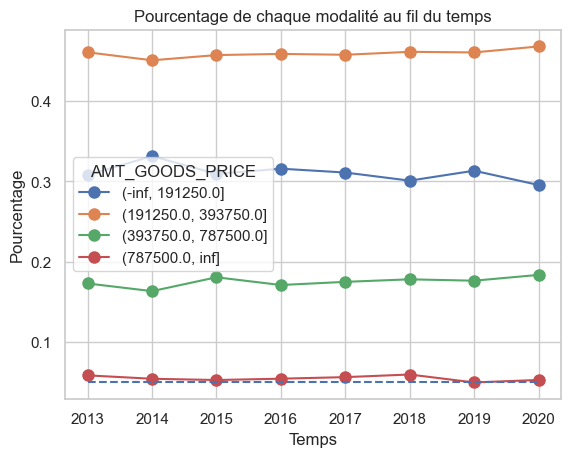

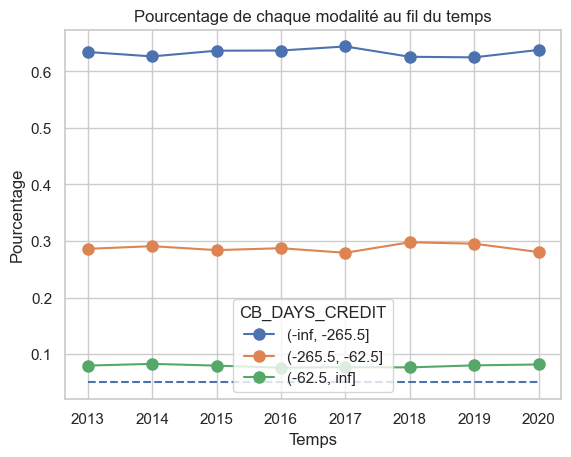

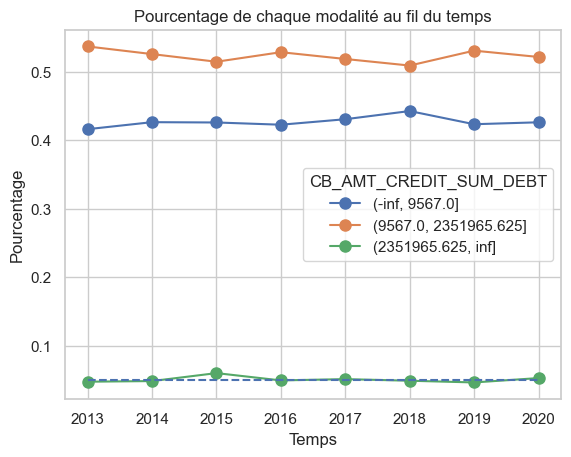

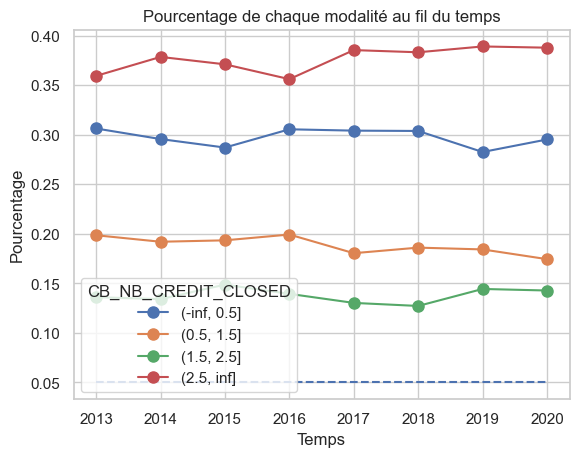

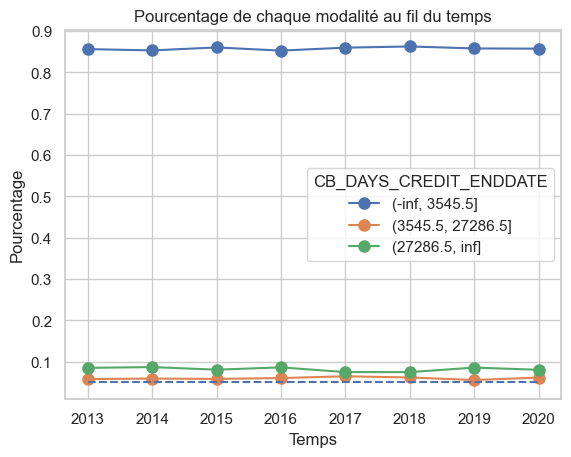

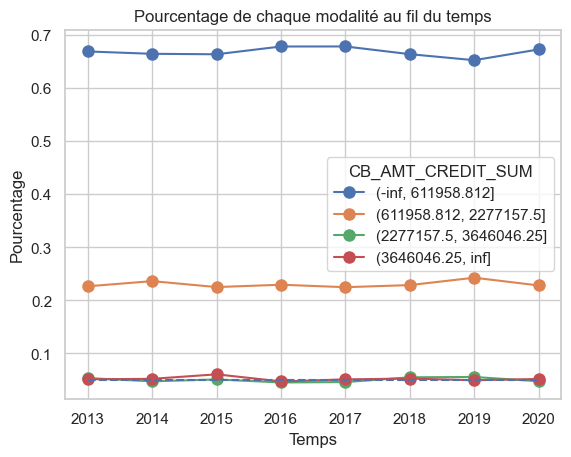

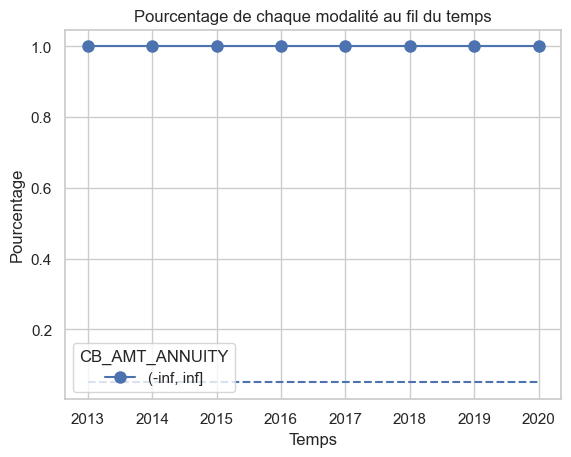

In [134]:
for col in discretised_cols+discretised_cols_2:
    show_volume_stability_overtime(data_train,col)

In [135]:
for col in discretised_cols+discretised_cols_2:
    print(f"{col} : {calculate_information_value_from_contingency_table(pd.crosstab(data_train['TARGET'], data_train[col]))}")
    print(60*"=")

AMT_INCOME_TOTAL_NORM : 0.04359364852102521
AMT_CREDIT_TO_INCOME : 0.017207988814487263
BORROWER_AGE : 0.09134876972712279
BORROWER_SENIORITY : 0.11829469863208525
BORROWER_FIDELITY : 0.030476059097291043
AMT_CREDIT_NORM : 0.0
DAYS_LAST_PHONE_CHANGE : 0.0871040272567881
AMT_ANNUITY : 0.0432278567362762
AMT_GOODS_PRICE : 0.16898969511378692
CB_DAYS_CREDIT : 0.07645456682609224
CB_AMT_CREDIT_SUM_DEBT : 0.02818279101246112
CB_NB_CREDIT_CLOSED : 0.04107833073301956
CB_DAYS_CREDIT_ENDDATE : 0.02808569233842369
CB_AMT_CREDIT_SUM : 0.02972220036300121
CB_AMT_ANNUITY : 0.0


In [136]:
cramers_v(pd.crosstab(data["BORROWER_AGE"], data["BORROWER_SENIORITY"]))

0.1308763155383923

In [137]:
data_train[["AMT_CREDIT_NORM" , "BORROWER_AGE" , "BORROWER_FIDELITY" , "FLAG_OWN_CAR"]].isna().mean()

AMT_CREDIT_NORM      0.0
BORROWER_AGE         0.0
BORROWER_FIDELITY    0.0
FLAG_OWN_CAR         0.0
dtype: float64

In [138]:
data_train[["REGION_RATING_CLIENT_W_CITY","FAM_STATS_CHILD", "NAME_EDUCATION_TYPE", "AMT_CREDIT_NORM" , "BORROWER_AGE" , "BORROWER_FIDELITY" , "BORROWER_SENIORITY","DAYS_LAST_PHONE_CHANGE"]].isna().mean()

REGION_RATING_CLIENT_W_CITY    0.0
FAM_STATS_CHILD                0.0
NAME_EDUCATION_TYPE            0.0
AMT_CREDIT_NORM                0.0
BORROWER_AGE                   0.0
BORROWER_FIDELITY              0.0
BORROWER_SENIORITY             0.0
DAYS_LAST_PHONE_CHANGE         0.0
dtype: float64

In [139]:
data_train["CB_DAYS_CREDIT"].value_counts()

CB_DAYS_CREDIT
(-inf, -265.5]     12928
(-265.5, -62.5]     5870
(-62.5, inf]        1618
Name: count, dtype: int64

In [140]:
formula="TARGET ~ C(AMT_GOODS_PRICE,Treatment(reference=0)) + C(OCCUPATION_TYPE,Treatment(reference=0)) + C(NAME_EDUCATION_TYPE,Treatment(reference='Non graduated'))  + C(DAYS_LAST_PHONE_CHANGE,Treatment(reference=3)) + C(BORROWER_SENIORITY,Treatment(reference=0)) + C(CB_NB_CREDIT_CLOSED, Treatment(reference=0))+ C(CB_DAYS_CREDIT,Treatment(reference=3)) - 1" # + C(DAYS_LAST_PHONE_CHANGE, Treatment(reference=3)) + C(FAM_STATS_CHILD,Treatment(reference='Single')) + +BORROWER_FIDELITY + C(BORROWER_AGE,Treatment(reference=0))
# à spécifier les modalités de références pour avoir 

In [159]:
model_logit=sm.Logit.from_formula(formula=formula,data=data_train).fit()

PatsyError: specified level 3 is out of range

In [ ]:
print(model_logit.summary())

: 

In [ ]:
y_train_proba=model_logit.predict(data_train)
gini=2*roc_auc_score(data_train["TARGET"],y_train_proba) - 1
print(f"{gini = :.3f}")

: 

In [ ]:
y_test_proba=model_logit.predict(data_test)
gini=2*roc_auc_score(data_test["TARGET"],y_test_proba) - 1
print(f"{gini = :.3f}")

: 

#### Construction de la grille de score

In [149]:
def grid_score(data_train,results_model_logit, variables_utilisees) -> pd.DataFrame:
    index_logit = list(results_model_logit.params.index)

    variables_logit = []
    modalites_variables = []

    # récupérer les variables
    for ligne in index_logit :
        variable = ligne.split(",")[0].replace("C(","")
        variables_logit.append(variable)

        modalite = ligne.split("[")[-1].replace("]","")
        if "T.Interval" in modalite :
            modalite = modalite.replace("T.Interval","")
        if ", closed='right'" in modalite :
            modalite = modalite.replace(", closed='right')", "]")
        if "T." in modalite :
            modalite = modalite.replace("T.","")
        modalites_variables.append(modalite)

    df_coef = pd.DataFrame({'Variable': variables_logit, 'Modalités': modalites_variables, 'Coefficient' : list(model_logit.params), 'p-value' : list(model_logit.pvalues)})

    # variables_utilisees = ["OCCUPATION_TYPE", "NAME_EDUCATION_TYPE"  , "AMT_CREDIT_NORM" , "BORROWER_AGE" , "BORROWER_SENIORITY" , "CB_NB_CREDIT_CLOSED", "CB_DAYS_CREDIT"]
    grid = {'Variable':[],'Modalités':[],'effectif':[],}

    for var in variables_utilisees:
        for modalite in data_train[var].value_counts().reset_index()[var].unique():
            grid['Variable'].append(var)
            grid['Modalités'].append(modalite)
            effectif_pct = data_train[var].value_counts(normalize=True)[modalite] 
            grid['effectif'].append(effectif_pct)
    grid=pd.DataFrame(grid)
    grid['Modalités'] =grid['Modalités'].apply(str) #màj ici
    grid['Coefficient']=0

    grid_df=pd.merge(grid.drop(columns='Coefficient'),df_coef, on=['Variable', 'Modalités'], how='outer')
    grid_df=grid_df.pivot_table(index=['Variable', 'Modalités'], values=['effectif', 'Coefficient', 'p-value'], aggfunc='sum')
    grid_df=grid_df.reset_index()
    grid_df['Modalités'] =grid_df['Modalités'].apply(str)

    grid_df = grid_df.drop_duplicates(subset=['Variable','Modalités'],keep='last').reset_index(drop=True)

    notes = []
    sum_diff = sum([coefficients.max() - coefficients.min() for variable, coefficients in grid_df.groupby('Variable')['Coefficient']])

    #chaque ligne du DataFrame
    for index, row in grid_df.iterrows():
        # Extraire la variable correspondante à la modalité
        variable = row['Variable']
        
        coefficients_variable = grid_df.loc[grid_df['Variable'] == variable, 'Coefficient']
        note = 1000 * ((coefficients_variable.max() - row['Coefficient']) / sum_diff)
        notes.append(note)


    grid_df['Note'] = notes

    for var in grid_df['Variable'].unique():
        for modal in grid_df[grid_df['Variable'] == var]['Modalités'].unique():
            tmp = data_train[var].value_counts(normalize=True)
            proportion = tmp[tmp.index.astype(str) == modal].iloc[0]
            grid_df.loc[(grid_df['Variable'] == var) & (grid_df['Modalités'] == modal), 'effectif'] = proportion


    moyennes= {}
    contributions = []
    for var in grid_df['Variable'].unique():
        moyennes[var] = grid_df[grid_df['Variable']==var]['Note'].mean()
        
    denominator = np.sum([np.sqrt(np.sum([(row['effectif'] * (row['Note'] - moyennes[var])**2) for _, row in grid_df.loc[grid_df['Variable'] == var].iterrows()])) for var in grid_df['Variable'].unique()])

    for index, row in grid_df.iterrows():
        variable = row['Variable']
        mean_note = moyennes[variable]
        #formule
        numerator = np.sqrt(np.sum([(row['effectif'] * (row['Note'] - mean_note)**2) for _, row in grid_df.loc[grid_df['Variable'] == variable].iterrows()]))
        contribution = numerator / denominator
        contributions.append(contribution*100)


    grid_df['Contribution'] = contributions

    tx_df = {'Variable':[],'Modalités':[],'tx_defaut':[]}
    for var in grid_df['Variable'].unique():
        for modalite in grid_df[grid_df['Variable']==var]['Modalités'].unique():

            defauts = data_train[data_train[var].apply(str)==modalite]['TARGET'].sum()
            tout_lemonde =  data_train[data_train[var].apply(str)==modalite]['TARGET'].shape[0]
            tx_defaut= defauts/tout_lemonde * 100
            tx_df['Variable'].append(var)
            tx_df['Modalités'].append(modalite)
            tx_df['tx_defaut'].append(tx_defaut)

    tx_df= pd.DataFrame(tx_df)
    Grille_score = pd.merge(grid_df, tx_df, on=['Variable', 'Modalités'], how='left')
    Grille_score['Contribution'] = Grille_score['Contribution'].apply(lambda row: round(row,2))
    Grille_score['Note'] = Grille_score['Note'].apply(lambda row: round(row))
    Grille_score['tx_defaut'] = Grille_score['tx_defaut'].apply(lambda row: round(row,2))
    Grille_score['Coefficient'] = Grille_score['Coefficient'].apply(lambda row: round(row,4))
    Grille_score['p-value'] = Grille_score['p-value'].apply(lambda row: round(row,3))
    Grille_score['effectif'] = Grille_score['effectif'].apply(lambda row: round(row*100,1))

    return Grille_score

In [ ]:
liste_variables_utilisees = ["OCCUPATION_TYPE", "NAME_EDUCATION_TYPE"  , "AMT_GOODS_PRICE" , "BORROWER_AGE" , "BORROWER_SENIORITY" , "CB_NB_CREDIT_CLOSED", "CB_DAYS_CREDIT"]
grille = grid_score(data_train,model_logit, liste_variables_utilisees)

: 

In [ ]:
grille

: 

In [ ]:
grille["Contribution"].unique().sum()

: 

In [ ]:
grille.groupby("Variable")["Note"].max().sum()

: 

In [ ]:
# import openpyxl
# grille.to_excel("../data/grille_de_score_revolving.xlsx")

: 

In [ ]:
def attribute_score(grid_score, data):
    data['Note'] = 0  
    for var in grid_score["Variable"].unique():
        modal = grid_score[grid_score['Variable'] == var]['Modalités'].unique()
        for i in range(len(modal)):
            condition = data[var].apply(str) == modal[i]  # Condition pour vérifier la modalité
            note = grid_score[(grid_score['Variable'] == var) & (grid_score['Modalités'] == str(modal[i]))]['Note'].values[0]
            data['Note'] = np.where(condition, data['Note'] + note, data['Note'])
    pass

: 

In [ ]:
attribute_score(grille,data_train)
attribute_score(grille,data_test)

: 

In [ ]:
data_train.shape

: 

In [ ]:
data_train["Note"]

: 

In [ ]:
def show_conditionnal_density(data:pd.DataFrame, colname:str):
    plt.figure(figsize=(10, 6))
    # Plot des distributions kernel pour TARGET==0 et TARGET==1
    sns.kdeplot(data.loc[data["TARGET"]==0, colname], color='green', label='TARGET=0', fill=False)
    sns.kdeplot(data.loc[data["TARGET"]==1, colname], color='red', label='TARGET=1', fill=False)

    plt.title(f"Distribution de {colname} sur le test")
    plt.xlabel(f"{colname}")
    plt.ylabel('Pourcentage')
    plt.legend()
    plt.show()

: 

In [ ]:
show_conditionnal_density(data_train,"Note")

: 

In [ ]:
show_conditionnal_density(data_test,"Note")

: 

#### Segmentation -- CHR

In [ ]:
from jenkspy import JenksNaturalBreaks

: 

In [ ]:
segment=JenksNaturalBreaks(n_classes=7)
segment.fit(data_train["Note"].values)

: 

In [ ]:
segment.breaks_

: 

In [ ]:
segment.goodness_of_variance_fit(data_train["Note"])

: 

In [ ]:
data_train["Segment"]=segment.predict(data_train["Note"].values)
data_test["Segment"]=segment.predict(data_test["Note"].values)

: 

In [ ]:
csv_file_path = "./data/data_seg_train_2020_revolving.csv"
data_train.to_csv(csv_file_path, index=False)

print(f"DataFrame sauvegardé avec succès sous {csv_file_path}")

: 

In [ ]:
csv_file_path = "./data/data_seg_test_2020_revolving.csv"
data_test.to_csv(csv_file_path, index=False)

print(f"DataFrame sauvegardé avec succès sous {csv_file_path}")

: 

In [ ]:
data_train["Segment"].value_counts(normalize=True)

: 

In [ ]:
data_train[["Segment","TARGET"]].groupby("Segment").mean()

: 

In [ ]:
def subplot_segment_default_rate(data):
    mean_target_by_segment = data.groupby('Segment')['TARGET'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data['Segment'].value_counts(normalize=True), color='lightblue', label='Distribution des Segments')
    ax2 = ax.twinx()
    sns.lineplot(x='Segment', y='TARGET', data=mean_target_by_segment, marker='o', color='red', linewidth=2, label='Taux de défaut')
    ax.set_ylabel('Taux d\'observations par segment', color='blue')
    ax2.set_ylabel('Taux de défaut', color='blue')
    plt.title('Répartition des CHR et des taux de défaut par CHR')
    plt.show()
    pass

: 

In [ ]:
subplot_segment_default_rate(data_train)

: 

In [ ]:
mean_target_by_segment = data_train.groupby('Segment')['TARGET'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(data_train['Segment'].value_counts(normalize=True), color='lightblue', label='Distribution des Segments')
ax2 = ax.twinx()
sns.lineplot(x='Segment', y='TARGET', data=mean_target_by_segment, marker='o', color='red', linewidth=2, label='Taux de défaut')
ax.set_ylabel('Taux d\'observations par segment', color='blue')
ax2.set_ylabel('Taux de défaut', color='blue')
plt.title('Répartition des CHR et des taux de défaut par CHR sur le jeu d\'entrainement')
plt.show()

: 

In [ ]:
mean_target_by_segment = data_test.groupby('Segment')['TARGET'].mean().reset_index()

# Configurer le style seaborn
# sns.set(style="whitegrid")

# Créer le graphique
plt.figure(figsize=(10, 6))
ax = sns.barplot(data_test['Segment'].value_counts(normalize=True), color='lightblue', label='Distribution des Segments')
ax2 = ax.twinx()
sns.lineplot(x='Segment', y='TARGET', data=mean_target_by_segment, marker='o', color='red', linewidth=2, label='Taux de défaut')

# Ajouter des étiquettes et un titre
ax.set_ylabel('Taux d\'observations par segment', color='blue')
ax2.set_ylabel('Taux de défaut', color='blue')
plt.title('Répartition des CHR et des taux de défaut par CHR sur le jeu de test')

# Afficher le graphique
plt.show()

: 

In [ ]:
data_test[["Segment","TARGET"]].groupby("Segment").mean()

: 

In [ ]:
show_volume_stability_overtime(data_train,"Segment",0.03)

: 

In [ ]:
show_risk_stability_overtime(data_train,"Segment")

: 

#### Model calibration (méthodes d'inférence non paramétrique)

##### MoC C

In [ ]:
# Nombre d'échantillons bootstrap par segment
num_bootstrap_samples = 1000
moc_c_segment={}

def lra_calculation(sample):
    lra = sample.groupby("date_annee").mean().mean()
    return lra.values

# Boucle pour chaque segment
for segment in range(7):
    # Echantillons bootstrap
    sample_size=data_test[data_test["Segment"]==segment].shape[0]
    bootstrap_samples = [data_test[data_test["Segment"]==segment].sample(frac=1, replace=True)[["TARGET","date_annee"]] for _ in range(num_bootstrap_samples)]
    
    # Default rate
    lra_s = [lra_calculation(sample) for sample in bootstrap_samples]
    
    # Calculer le 90e centile et la moyenne
    percentile_90 = np.percentile(lra_s, 90)
    mean_rate = np.mean(lra_s)
    moc_c=percentile_90 - mean_rate
    moc_c_segment[segment]=moc_c
    
    temp_df = pd.DataFrame({
        'Size':[sample_size],
        'Segment': [segment],
        'Percentile_90': [percentile_90],
        'Mean_Rate': [mean_rate],
        "MoC_C": [moc_c]
    })
    
    print(temp_df)

: 

In [ ]:
moc_c_segment

: 

##### MoC A

In [ ]:
show_volume_stability_overtime(data_train,"TARGET")

: 

In [ ]:
show_volume_stability_overtime(data_test,"TARGET")

: 

In [ ]:
# Quantification :
deficiency_impact=((data.loc[data["date_annee"]<2019,"TARGET"].mean())/(data["TARGET"].mean()) - 1 )*100

: 

In [ ]:
deficiency_impact

: 

In [ ]:
# Nombre d'échantillons bootstrap par segment
num_bootstrap_samples = 1000
moc_a_segment={}
# Fonction pour calculer le taux de 1 dans un échantillon bootstrap

def calculate_adjustment(sample:pd.DataFrame):
    ajustement=sample.loc[sample["date_annee"]<2019,["TARGET","date_annee"]].groupby("date_annee").mean().mean() - sample[["TARGET","date_annee"]].groupby("date_annee").mean().mean()
    return ajustement.values

# Boucle pour chaque segment
for segment in range(7):
    # Générer des échantillons bootstrap
    sample_size=data_test[data_test["Segment"]==segment].shape[0]
    bootstrap_samples = [data_test[data_test["Segment"]==segment].sample(frac=1, replace=True)[["TARGET","date_annee"]] for _ in range(num_bootstrap_samples)]
    
    # Calcul de l'ajustement sur chaque echantillon
    adjustments = [calculate_adjustment(sample) for sample in bootstrap_samples]
    
    # Calculer le 90e centile et la moyenne
    percentile_90 = np.percentile(adjustments, 90)
    mean_rate = np.mean(adjustments)
    moc_a= percentile_90 - mean_rate
    moc_a_segment[segment] = moc_a
    # Créer un DataFrame temporaire pour le segment actuel
    temp_df_a = pd.DataFrame({
        'Size':[sample_size],
        'Segment': [segment],
        'Percentile_90': [percentile_90],
        'Mean_Rate': [mean_rate],
        "MoC_A": [moc_a]
    })
    
    print(temp_df_a)

: 

In [ ]:
moc_a_segment

: 

In [ ]:
lra_=data_train[["date_annee","Segment","TARGET"]].groupby(["Segment","date_annee"]).mean().reset_index()

: 

In [ ]:
lra=lra_[["Segment","TARGET"]].groupby("Segment").mean()

: 

In [ ]:
summary=pd.concat([lra, pd.DataFrame(list(moc_a_segment.values()), columns=["MOC_A"]), pd.DataFrame(list(moc_c_segment.values()), columns=["MOC_C"])], axis=1)

: 

In [ ]:
summary["PD"]=summary.sum(axis=1)

: 

In [ ]:
summary.rename(columns={"TARGET":"LRA"}, inplace=True)

: 

In [ ]:
summary

: 

: 

AMT_CREDIT_NORM "BORROWER_AGE", 


In [157]:
out_of_sample_data["BORROWER_SENIORITY"]

KeyError: 'BORROWER_SENIORITY'

In [146]:
discretised_cols=["AMT_CREDIT_NORM" , "BORROWER_AGE" , "BORROWER_SENIORITY" , "CB_NB_CREDIT_CLOSED", "CB_DAYS_CREDIT"
                  ]

dt_discretizer=DecisionTreeDiscretizer(target=out_of_sample_data["TARGET"]) #instanciation du discrétiseur

for col in discretised_cols:
    dt_discretizer.fit(out_of_sample_data[col])
    out_of_sample_data[col]=dt_discretizer.transform(out_of_sample_data[col])


In [148]:
dt_discretizer

In [158]:
liste_variables_utilisees = ["OCCUPATION_TYPE", "NAME_EDUCATION_TYPE"  , "AMT_CREDIT_NORM" , "BORROWER_AGE" , "BORROWER_SENIORITY" , "CB_NB_CREDIT_CLOSED", "CB_DAYS_CREDIT"]
grille = grid_score(out_of_sample_data,model_logit, liste_variables_utilisees)


grille.to_excel("data/grille_de_score_2020.xlsx")
print("La grille de score est exportée au dossier data au nom de grille_de_score")


attribute_score(grille,out_of_sample_data)

NameError: name 'model_logit' is not defined

In [ ]:
segment=JenksNaturalBreaks(n_classes=7)
segment.fit(out_of_sample_data["Note"].values)

print(f"Les seuils de découpage sont {segment.breaks_}")

out_of_sample_data["Segment"]=segment.predict(out_of_sample_data["Note"].values)


In [ ]:
csv_file_path = "./data/data_seg_revolving_2020.csv"
data_test.to_csv(csv_file_path, index=False)

print(f"DataFrame sauvegardé avec succès sous {csv_file_path}")